# Доп материалы

###### Ссылка на презентацию: https://disk.yandex.ru/i/3jEx9gTBEGejNA

###### Ссылка на дашборд: https://public.tableau.com/app/profile/maxim1170/viz/Dash_Banks_corr/Dashboard1

## Анализ оттока клиентов  
Главная задача - анализ оттока клиентов банка "Метанпромбанк". Анализ покажет, как клиенты пользуются услугами банка, а так же поможет составить портрет клиентов, которые склонны уходить из банка.  
Задача:  
Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

- Провести исследовательский анализ данных,
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.
    
    *Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Сформулировать и проверить статистическую гипотезу относительно представленных данных*  

Данные cостав:  
userid — идентификатор пользователя,  
score — баллы кредитного скоринга,  
city — город,  
gender — пол,  
age — возраст,  
equity — приблизительная оценка собственности клиента,  
balance — баланс на счёте,  
products — количество продуктов, которыми пользуется клиент,  
credit_card — есть ли кредитная карта,  
last_activity — был ли клиент активен последнее время,  
salary — заработная плата клиента,  
churn — уходит или нет.

## Таким образом анализ будет делиться на следующие этапы:

### 1.Предобработка данных:  

#### а) Исследовать пропущенные значения (столбец баланс)

#### б) Исследовать соответствие типов

#### в) Исследовать дубликаты

#### г) Проверить корректность наименований колонок

#### д) Переименовать колонки

#### е) Скопировать столбцы с категориальными неупорядоченными данными и осуществить закодирование

### 2. Исследовательский анализ данных

#### а) Провести анализ таблиц 

#### б) Изучить распределение характеристик (сколько в каждом городе отточных/не отточных, распределение по полу, сколько отточных/не отточных на количество продуктов, сколько отточных были не активны в последнее время и наоборот)

#### в) Изучить уходящих разделив клиентов на 6 категорий (город, пол, продукт, активность, кредитная карта, наличие имущества)

#### г) Провести корреляционный анализ с помощью матрицы корреляций phic

#### д) Сделать вывод как доход влияет на уход клиента (проверка первой гипотезы - различия дохода между теми клиентами, которые ушли и теми, которые остались)

#### е) Сделать вывод о влиянии количества продукта на уход (проверка второй гипотезы)

### Сделать вывод какие показатели влияют на отток 

### На основе сделанного вывода предложить сегментацию клиентов

### Итоговый вывод и предоставление рекомендаций заказчику по мероприятиям

# Загружаем данные

In [2]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy import stats as st
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import math as mth

In [3]:
pip install phik

     |████████████████████████████████| 679 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [6]:
import missingno
print("Missingno Version : {}".format(missingno.__version__))

Missingno Version : 0.5.1


In [7]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
df = pd.read_csv(path)

In [8]:
df.head(10)

USERID  score       city gender  age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3  225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4  157978  730.0  Ярославль      М   34       5      174.00         1   
5  202305  856.0    Рыбинск      М   56       4   863687.24         3   
6  177259  807.0  Ярославль      Ж   39       3   405042.44         3   
7  218868  825.0  Ярославль      Ж   38       4   458145.40         2   
8  211686  923.0  Ярославль      М   54       5  1206337.87         2   
9  133130  906.0  Ярославль      Ж   67       0         NaN         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1  
5            1              0   156619.80      0  
6            0              1   103838.32      0  
7            1              1    68085.48      0  
8            1              0   155371.79      0  
9            0              1   238055.53      0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


###### На первый взгляд типы все соотвествуют , есть пропуски в столбце 'balance', нужно будет переименовать некоторые столбцы. Приступим к предобработке.

# Предобработка данных

0.2295

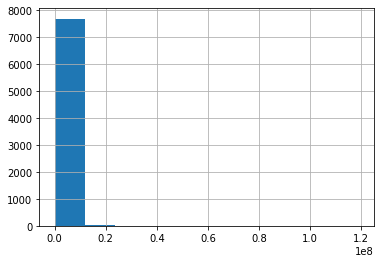

In [10]:
# посмотрим над пропуском в столбце 'balance'
df['balance'].hist()
df['balance'].isna().mean()

In [11]:
df['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

In [12]:
df.query('balance == 0')

USERID  score       city gender  age  equity  balance  products  \
3900  179831  730.0  Ярославль      М   18       0      0.0         2   
6757  148456  813.0  Ярославль      М   20       2      0.0         2   

      credit_card  last_activity  EST_SALARY  churn  
3900            1              1    64548.33      0  
6757            1              0    23876.51      0

In [13]:
# почти 23% пропусков в столбце, посмотрим на отдельные данные с пропусками
df_isna = df[df['balance'].isna()]
df_isna

USERID  score       city gender  age  equity  balance  products  \
2     120722  892.0    Рыбинск      Ж   30       0      NaN         1   
9     133130  906.0  Ярославль      Ж   67       0      NaN         1   
10    148929  927.0     Ростов      М   52       0      NaN         1   
11    172184  921.0     Ростов      М   41       0      NaN         1   
19    127034  922.0    Рыбинск      Ж   53       0      NaN         1   
...      ...    ...        ...    ...  ...     ...      ...       ...   
9976  208085  876.0     Ростов      М   38       0      NaN         1   
9984  125941  729.0  Ярославль      Ж   42       0      NaN         1   
9993  219924  884.0    Рыбинск      Ж   36       0      NaN         1   
9996  139170  894.0  Ярославль      М   46       0      NaN         1   
9997  115639  903.0  Ярославль      М   24       0      NaN         2   

      credit_card  last_activity  EST_SALARY  churn  
2               1              1   107683.34      0  
9               0              1   238055.53      0  
10              1              1   196820.07      0  
11              1              1   217469.48      0  
19              0              0   147094.82      0  
...           ...            ...         ...    ...  
9976            0              0   171763.69      0  
9984            1              1   687538.70      0  
9993            1              1   169844.88      0  
9996            1              0   196898.29      0  
9997            1              1   108905.09      0  

[2295 rows x 12 columns]

In [14]:
# есть теория, посмотрим распределение пропусков в полученном датасете по столбцам 'churn' и 'last_activity'
df_isna['churn'].value_counts()

0    2282
1      13
Name: churn, dtype: int64

In [15]:
df_isna['last_activity'].value_counts()

1    1261
0    1034
Name: last_activity, dtype: int64

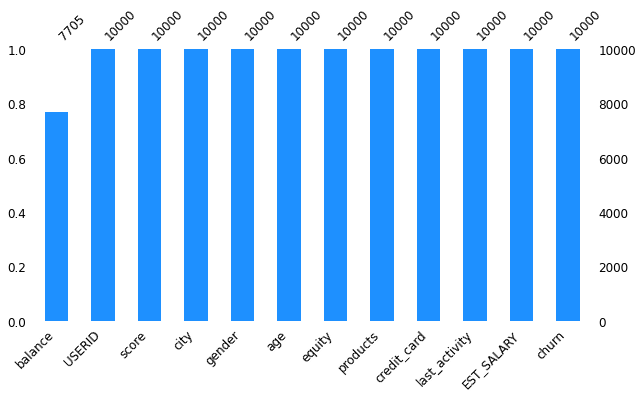

In [16]:
missingno.bar(df, color='dodgerblue', sort='ascending', figsize=(10,5), fontsize=12);

In [17]:
# Нужно сгруппировать баланс, относительно того, отсутствует значение или нет.
#True - отсутствует значение
#False - значение заполнено

df.groupby(df['balance'].isnull()).mean()

USERID      score        age    equity       balance  \
balance                                                                
False    171738.837508  843.73926  43.131343  3.395068  827794.30651   
True     172069.447930  865.35207  41.849237  0.050980           NaN   

         products  credit_card  last_activity     EST_SALARY     churn  
balance                                                                 
False    2.086178     0.640104       0.515769  124501.872366  0.234783  
True     1.162092     0.815686       0.549455  226310.208654  0.005664

In [18]:
# добавим столбец 'balance_NaN'
df['balance_NaN'] = np.where(df['balance'].isnull(), 0,1)

In [19]:
df['balance_NaN'].value_counts()

1    7705
0    2295
Name: balance_NaN, dtype: int64

In [20]:
df.groupby('balance_NaN').mean()

USERID      score        age    equity       balance  \
balance_NaN                                                                
0            172069.447930  865.35207  41.849237  0.050980           NaN   
1            171738.837508  843.73926  43.131343  3.395068  827794.30651   

             products  credit_card  last_activity     EST_SALARY     churn  
balance_NaN                                                                 
0            1.162092     0.815686       0.549455  226310.208654  0.005664  
1            2.086178     0.640104       0.515769  124501.872366  0.234783

In [21]:
# уход клиентов в зависимости от наличия инфо о балансе
df.groupby(['balance_NaN']) ['churn'].value_counts(normalize=True)

balance_NaN  churn
0            0        0.994336
             1        0.005664
1            0        0.765217
             1        0.234783
Name: churn, dtype: float64

In [22]:
# уход клиентов в зависимости от наличия инфо о балансе и количества продукта
df.groupby(['balance_NaN','equity']) ['churn'].value_counts(normalize=True)

balance_NaN  equity  churn
0            0       0        0.994495
                     1        0.005505
             1       0        1.000000
             3       1        1.000000
1            0       0        0.810680
                     1        0.189320
             1       0        0.859091
                     1        0.140909
             2       0        0.842205
                     1        0.157795
             3       0        0.791180
                     1        0.208820
             4       0        0.748649
                     1        0.251351
             5       0        0.699166
                     1        0.300834
             6       0        0.639752
                     1        0.360248
             7       0        0.537500
                     1        0.462500
             8       0        0.647059
                     1        0.352941
             9       1        0.538462
                     0        0.461538
Name: churn, dtype: float64

In [23]:
df.groupby(['balance_NaN'])['score'].value_counts(normalize=True)

balance_NaN  score
0            912.0    0.017429
             913.0    0.017429
             900.0    0.016993
             903.0    0.016122
             920.0    0.015251
                        ...   
1            721.0    0.000130
             722.0    0.000130
             981.0    0.000130
             995.0    0.000130
             998.0    0.000130
Name: score, Length: 547, dtype: float64

In [24]:
df.groupby(['balance_NaN'])['age'].value_counts(normalize=True)

balance_NaN  age
0            33     0.048802
             36     0.045316
             34     0.042266
             37     0.042266
             35     0.039651
                      ...   
1            82     0.000260
             83     0.000260
             84     0.000260
             79     0.000130
             86     0.000130
Name: age, Length: 134, dtype: float64

In [25]:
df.groupby(['balance_NaN'])['equity'].value_counts(normalize=True)

balance_NaN  equity
0            0         0.949891
             1         0.049673
             3         0.000436
1            5         0.248929
             4         0.240104
             3         0.200130
             2         0.136535
             1         0.085659
             0         0.053472
             6         0.020896
             7         0.010383
             8         0.002206
             9         0.001687
Name: equity, dtype: float64

In [26]:
df.groupby(['balance_NaN'])['products'].value_counts(normalize=True)

balance_NaN  products
0            1           0.849673
             2           0.137255
             3           0.012636
             0           0.000436
1            2           0.622064
             1           0.180532
             3           0.131992
             4           0.061518
             5           0.003894
Name: products, dtype: float64

In [27]:
df.groupby(['balance_NaN'])['credit_card'].value_counts(normalize=True)

balance_NaN  credit_card
0            1              0.815686
             0              0.184314
1            1              0.640104
             0              0.359896
Name: credit_card, dtype: float64

In [28]:
df.groupby(['balance_NaN'])['last_activity'].value_counts(normalize=True)

balance_NaN  last_activity
0            1                0.549455
             0                0.450545
1            1                0.515769
             0                0.484231
Name: last_activity, dtype: float64

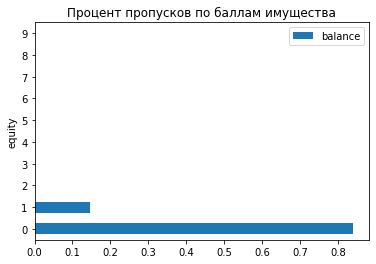

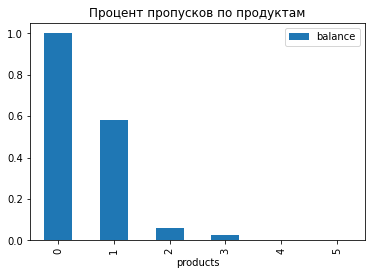

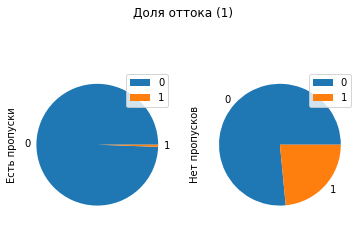

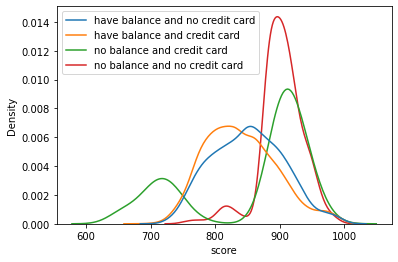

In [29]:
USERID = "USERID"
df_nan_mean = df.groupby(df.balance.isna().map({False:"Нет пропусков",True:"Есть пропуски"}))\
      .mean().T.drop(USERID)
df_nan_mean['%'] = 1-df_nan_mean["Нет пропусков"]/df_nan_mean["Есть пропуски"]
display(df_nan_mean.sort_values('%').style.format("{:_.2f}"))

df.groupby('equity').agg({"balance":lambda series:series.isna().mean()})\
  .plot(kind="barh").set(title="Процент пропусков по баллам имущества")

df.groupby('products').agg({"balance":lambda series:series.isna().mean()})\
  .plot(kind="bar").set(title="Процент пропусков по продуктам")

df.assign(balance_na = df.balance.isna().map({False:"Нет пропусков",True:"Есть пропуски"}))\
  .pivot_table(index='churn',columns="balance_na",values=USERID,aggfunc="count")\
  .plot.pie(subplots=True, title="Доля оттока (1)")
plt.show()

nan_bal_cc_groups = df.balance.isna().map({False:"have balance ",True:"no balance "})\
                  + df.credit_card.map({1:"and credit card",0:"and no credit card"})

sns.kdeplot(data=df,hue=nan_bal_cc_groups,x='score',common_norm=False);

###### При рассмотрении взаимосвязи пропусков с другими столбцами была найдена свзяь пропусков с кредитными продуктами. По столбцу последняя активность пропуски равнозначны, по скор и возрасту и тд. Также столбец 'churn', среди оставщихся присутствуют пропуски. Вообще как правило те кто уходит, им счет закрывают , соответственно должно быть 0. Но есть и те у кого какие-кто копейки присутсвуют из ушедших ). С учетом того, что взаимосвязь найдена с столбцом по кредитным продуктам принимаю решение отнести  пропуски к категории MNAR и тем самым их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям. Поэтому оставляем пропуски как есть.

In [30]:
# посмотрим отдельно те строки где уходит = да
df_isna.query('churn == 1')

USERID  score       city gender  age  equity  balance  products  \
1273  136567  961.0  Ярославль      М   31       0      NaN         1   
1400  146876  707.0  Ярославль      М   24       0      NaN         3   
3017  123230  980.0    Рыбинск      Ж   53       0      NaN         1   
4118  157443  727.0     Ростов      М   33       0      NaN         1   
4302  167482  955.0  Ярославль      М   62       0      NaN         1   
5578  136508  739.0    Рыбинск      М   49       0      NaN         2   
6827  205707  953.0  Ярославль      М   30       0      NaN         3   
7572  144559  748.0  Ярославль      М   45       0      NaN         1   
8185  116284  743.0  Ярославль      М   48       0      NaN         1   
8611  195981  763.0  Ярославль      Ж   48       0      NaN         1   
8957  147837  962.0    Рыбинск      Ж   79       3      NaN         0   
9181  228103  946.0    Рыбинск      М   37       0      NaN         3   
9227  116750  776.0  Ярославль      М   46       0      NaN         1   

      credit_card  last_activity  EST_SALARY  churn  
1273            1              0  1015386.14      1  
1400            1              0    94091.11      1  
3017            1              1   327646.02      1  
4118            1              0   132546.93      1  
4302            1              0   157784.96      1  
5578            1              1   280945.17      1  
6827            1              0   157069.20      1  
7572            1              0   288756.23      1  
8185            1              1   634457.21      1  
8611            1              0   248232.39      1  
8957            0              0    25063.96      1  
9181            0              0   196941.60      1  
9227            1              0   540423.84      1

In [31]:
# По причине изменения категории пропуска на MNAR принято решение оставить пропуски как есть. Свой код я закоментил.



# была теория, что пропуски стоят там, где люди уходят или давно не было активности. Она не подтвердилась,
# я предполагаю, что пропуски означают отсутствие средств на балансе (тем более, что с 0 есть только двое).
# поэтому я принимаю решение заполнить пропуски нулями.
# df['balance'] = df['balance'].fillna(0).astype('int')

In [32]:
#по типам все в порядке
df.dtypes

USERID             int64
score            float64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
balance_NaN        int64
dtype: object

In [33]:
# смотрим на дубликаты
df.duplicated().sum()

1

In [34]:
df_dub = df[df.duplicated()]
df_dub

USERID  score       city gender  age  equity  balance  products  \
9457  141945  929.0  Ярославль      М   33       0      NaN         1   

      credit_card  last_activity  EST_SALARY  churn  balance_NaN  
9457            1              0   381868.89      0            0

In [35]:
# удаляем дубликаты
df = df.drop_duplicates()

In [36]:
# ищу неявные дубликаты. Если они где-то есть, то скорее всего в столбце 'USERID'
df_dup = pd.DataFrame(df['USERID'].value_counts()).reset_index()
df_dup

index  USERID
0     227795       2
1     198635       2
2     210898       2
3     163657       2
4     202983       2
...      ...     ...
9922  146877       1
9923  214466       1
9924  226756       1
9925  173510       1
9926  215039       1

[9927 rows x 2 columns]

In [37]:
df_dupb = df_dup.query('USERID > 1')
df_dupb

index  USERID
0   227795       2
1   198635       2
2   210898       2
3   163657       2
4   202983       2
..     ...     ...
67  221197       2
68  217412       2
69  200863       2
70  214031       2
71  164676       2

[72 rows x 2 columns]

In [38]:
df_list = df_dupb['index'].tolist()
df_list

[227795,
 198635,
 210898,
 163657,
 202983,
 226550,
 155872,
 188957,
 171751,
 120258,
 210662,
 170312,
 131419,
 129785,
 211130,
 219343,
 222480,
 181526,
 217643,
 206759,
 148826,
 160075,
 187635,
 210627,
 217826,
 220816,
 143592,
 175730,
 210792,
 208815,
 127440,
 163207,
 149365,
 117943,
 152479,
 208738,
 126368,
 210135,
 208081,
 183510,
 221156,
 226719,
 217619,
 197364,
 228075,
 141265,
 140934,
 195884,
 155765,
 140377,
 162053,
 116540,
 221809,
 168998,
 190253,
 124450,
 216848,
 123461,
 218868,
 187459,
 185829,
 191520,
 151662,
 150667,
 172142,
 199312,
 185748,
 221197,
 217412,
 200863,
 214031,
 164676]

In [39]:
df_filtr = df.loc[df['USERID'].isin(df_list)]

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
df_filtr.sort_values(by='USERID')

USERID  score       city gender  age  equity      balance  products  \
7694  116540  887.0  Ярославль      Ж   38       0          NaN         1   
1893  116540  883.0  Ярославль      Ж   55       1    362756.49         3   
4866  117943  855.0    Рыбинск      Ж   32       6   1036832.93         4   
7542  117943  880.0  Ярославль      Ж   40       0          NaN         1   
5863  120258  908.0    Рыбинск      Ж   38       4   2213581.63         2   
5896  120258  905.0  Ярославль      М   30       0          NaN         1   
8638  123461  934.0    Рыбинск      М   34       0          NaN         2   
1411  123461  829.0    Рыбинск      Ж   59       0     96222.44         2   
8164  124450  859.0  Ярославль      Ж   38       6    516811.20         1   
9775  124450  758.0    Рыбинск      Ж   36       0     73574.07         2   
5420  126368  832.0     Ростов      Ж   33       0          NaN         1   
4850  126368  909.0  Ярославль      Ж   30       4   1322623.29         2   
8785  127440  663.0  Ярославль      М   60       0          NaN         1   
4443  127440  846.0    Рыбинск      М   26       1     57405.67         5   
9504  129785  949.0  Ярославль      М   43       0          NaN         1   
3988  129785  904.0  Ярославль      М   33       5   2427737.60         3   
2138  131419  739.0  Ярославль      Ж   37       3   1307941.65         3   
904   131419  934.0  Ярославль      М   35       5   2348335.95         2   
1608  140377  802.0  Ярославль      М   26       3    539863.29         4   
7487  140377  930.0    Рыбинск      Ж   34       5   1123967.02         1   
9819  140934  832.0    Рыбинск      М   45       3    385763.16         2   
4212  140934  919.0  Ярославль      Ж   29       4    603946.18         3   
2276  141265  858.0  Ярославль      М   37       4    471599.16         2   
5569  141265  811.0     Ростов      Ж   33       3   1044316.88         2   
5557  143592  764.0  Ярославль      Ж   68       3    508919.15         2   
5369  143592  885.0  Ярославль      Ж   56       4   1201087.46         2   
5252  148826  895.0  Ярославль      М   32       5   1470273.14         2   
8364  148826  909.0    Рыбинск      Ж   32       0          NaN         3   
8272  149365  793.0    Рыбинск      Ж   61       0    476496.99         2   
946   149365  877.0  Ярославль      М   41       5    819182.01         2   
2439  150667  813.0  Ярославль      Ж   44       0     62504.47         4   
9267  150667  931.0  Ярославль      М   41       0          NaN         1   
5495  151662  884.0    Рыбинск      М   46       0          NaN         1   
3683  151662  960.0  Ярославль      Ж   37       4   2527032.70         4   
5705  152479  723.0  Ярославль      Ж   22       0          NaN         1   
690   152479  768.0    Рыбинск      Ж   42       0    126787.79         4   
3274  155765  863.0  Ярославль      М   30       5   1036114.50         5   
5197  155765  923.0    Рыбинск      М   30       0          NaN         1   
1080  155872  896.0  Ярославль      М   36       3   1113656.92         3   
9363  155872  714.0    Рыбинск      Ж   29       0          NaN         1   
9508  160075  824.0     Ростов      Ж   57       3    355047.33         2   
3936  160075  899.0  Ярославль      М   34       4   1647814.67         4   
8733  162053  786.0  Ярославль      М   29       4    205824.97         3   
5629  162053  921.0    Рыбинск      М   33       3    857011.13         2   
6786  163207  838.0     Ростов      Ж   42       4    652776.60         2   
3564  163207  853.0    Рыбинск      М   42       4    543839.62         1   
9667  163657  849.0    Рыбинск      М   59       4   1254013.85         2   
6670  163657  903.0    Рыбинск      М   45       4   1343339.70         4   
58    164676  860.0     Ростов      М   37       5    648594.03         2   
7271  164676  790.0    Рыбинск      Ж   77       1    111202.01         1   
5020  168998  886.0  Ярославль      Ж   35       4    394780.61         2   
97

###### Я принимаю решение не удалять ничего, по причине того, что слишком много расхождений. При одинаковом USERID и разном поле/городе/возрасте явно можно сделать вывод, что это два разных человека. Но при одинаковых данных о поле/городе/возрасте тоже нельзя подтвердить, что это один и тот же человек, потому что в одном городе могут жить 2 мужчины 34 лет. 

In [42]:
# переименую столбцы и приведу их к нижнему регистру
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid':'user_id'})

In [43]:
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/lib/python3.9/site-packages/pandas/_config/config.py:620: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/pandas/_config/config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [44]:
# копирую столбцы с категориальными неупорядоченными данными и осуществляю закодирование
df = df.assign(city_cop = df.city)
df  = df.assign(gender_cop = df.gender)
df.columns = df.columns.str.strip()
df = pd.get_dummies(data=df, columns=['city_cop', 'gender_cop'])
df

user_id  score       city gender  age  equity     balance  products  \
0      183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1      146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2      120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3      225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4      157978  730.0  Ярославль      М   34       5      174.00         1   
...       ...    ...        ...    ...  ...     ...         ...       ...   
9995   120553  814.0    Рыбинск      М   27       1    78144.65         1   
9996   139170  894.0  Ярославль      М   46       0         NaN         1   
9997   115639  903.0  Ярославль      М   24       0         NaN         2   
9998   148700  777.0  Ярославль      Ж   68       3   865457.97         3   
9999    96267  828.0    Рыбинск      Ж   58       3  1180886.70         4   

      credit_card  last_activity  est_salary  churn  balance_nan  \
0               0              1    75719.14      1            1   
1               1              0    86621.77      0            1   
2               1              1   107683.34      0            0   
3               0              1   174423.53      1            1   
4               1              0    67353.16      1            1   
...           ...            ...         ...    ...          ...   
9995            0              1    18943.64      0            1   
9996            1              0   196898.29      0            0   
9997            1              1   108905.09      0            0   
9998            0              1    86874.90      0            1   
9999            0              1    21422.37      0            1   

      city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  gender_cop_Ж  \
0                   0                 1                   0             1   
1                   0                 1                   0             1   
2                   0                 1                   0             1   
3                   0                 0                   1             1   
4                   0                 0                   1             0   
...               ...               ...                 ...           ...   
9995                0                 1                   0             0   
9996                0                 0                   1             0   
9997                0                 0                   1             0   
9998                0                 0                   1             1   
9999                0                 1                   0             1   

      gender_cop_М  
0                0  
1                0  
2                0  
3                0  
4                1  
...            ...  
9995             1  
9996             1  
9997             1  
9998             0  
9999             0  

[9999 rows x 18 columns]

###### Мы провели предобработку данных в ходе которой заменили пропуски в столбце "balance" на "0", проверили типы данных на их соответствие, проверены на наличие явных дубликатов и удаление их, и поиск неявных дубликатов. В неявных дубликатах принято решение оставить и не удалять по причине того, что слишком много расхождений. При одинаковом USERID и разном поле/городе/возрасте явно можно сделать вывод, что это два разных человека. Но при одинаковых данных о поле/городе/возрасте тоже нельзя подтвердить, что это один и тот же человек, потому что в одном городе могут жить 2 мужчины 34 лет. Также были приведены к нижнему регистру наименования столбцов и переименованы и осуществлено закодирование данных для последующего анализа.

# Исследовательский анализ данных

In [45]:
# проводим анализ таблиц
df.describe()

user_id        score          age       equity       balance  \
count    9999.000000  9999.000000  9999.000000  9999.000000  7.705000e+03   
mean   171817.699870   848.691369    42.838084     2.627863  8.277943e+05   
std     33708.600055    65.446864    12.128714     1.980761  1.980614e+06   
min     94561.000000   642.000000    18.000000     0.000000  0.000000e+00   
25%    142815.500000   802.000000    34.000000     0.000000  2.955542e+05   
50%    172740.000000   853.000000    40.000000     3.000000  5.242722e+05   
75%    201262.500000   900.000000    51.000000     4.000000  9.807058e+05   
max    229145.000000  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  \
count  9999.000000  9999.000000    9999.000000  9.999000e+03  9999.000000   
mean      1.874187     0.680368       0.523552  1.478435e+05     0.182218   
std       0.799938     0.466357       0.499470  1.393758e+05     0.386044   
min       0.000000     0.000000       0.000000  2.546300e+03     0.000000   
25%       1.000000     0.000000       0.000000  7.525178e+04     0.000000   
50%       2.000000     1.000000       1.000000  1.196547e+05     0.000000   
75%       2.000000     1.000000       1.000000  1.744997e+05     0.000000   
max       5.000000     1.000000       1.000000  1.395064e+06     1.000000   

       balance_nan  city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  \
count  9999.000000      9999.000000       9999.000000         9999.000000   
mean      0.770577         0.143114          0.266327            0.590559   
std       0.420483         0.350207          0.442059            0.491755   
min       0.000000         0.000000          0.000000            0.000000   
25%       1.000000         0.000000          0.000000            0.000000   
50%       1.000000         0.000000          0.000000            1.000000   
75%       1.000000         0.000000          1.000000            1.000000   
max       1.000000         1.000000          1.000000            1.000000   

       gender_cop_Ж  gender_cop_М  
count   9999.000000   9999.000000  
mean       0.499250      0.500750  
std        0.500024      0.500024  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

###### Согласно полученным сведениям можно составить общий портрет клиента: скоринг - 848, почти одинаково по полу, средний возраст клиента 42 года, имеет в собственности более 2 объектов, количество продуктов более 1, вероятнее всего живет в Ярославле (почти 60%) , 26% из Рыбинска, 14% в Ростове. 

In [46]:
df.groupby('churn').mean()

user_id       score        age    equity       balance  products  \
churn                                                                           
0      172015.634585  845.410786  43.157760  2.374832  7.340637e+05  1.762015   
1      170929.383644  863.414380  41.403403  3.763447  1.133287e+06  2.377607   

       credit_card  last_activity     est_salary  balance_nan  \
churn                                                           
0         0.709307       0.483674  147764.047676     0.721047   
1         0.550494       0.702525  148199.982821     0.992865   

       city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  gender_cop_Ж  \
churn                                                                        
0             0.142106          0.272838            0.585056      0.532469   
1             0.147640          0.237102            0.615258      0.350165   

       gender_cop_М  
churn                
0          0.467531  
1          0.649835

###### В разбивке тех, кто уходит/не уходит мужчин уходит больше чем женщин (64%). 61% уходящих клиентов живут в Ярославле, 23% в Рыбинске, 14% в Ростове. Средняя зарплата "уходящего" - 148 тыс. рублей. Продуктов больше 2-х (причем у тех, кто остается у них в среднем меньше продуктов). Возраст между уходящим и остающим почти одинаков - 41 и 43 соотвественно. 

#### Сейчас посмотрим распределение данных характеристик в разрезе оттока

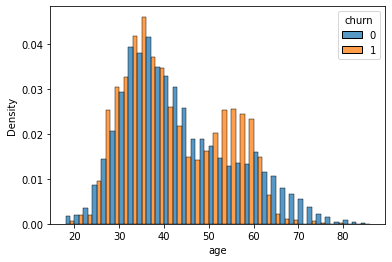

In [47]:
sns.histplot(data=df, x="age", hue="churn", multiple='dodge', stat="density", common_norm=False, binwidth=2);

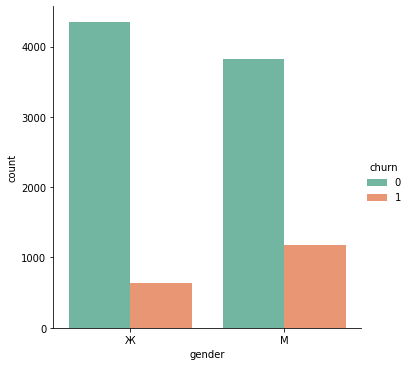

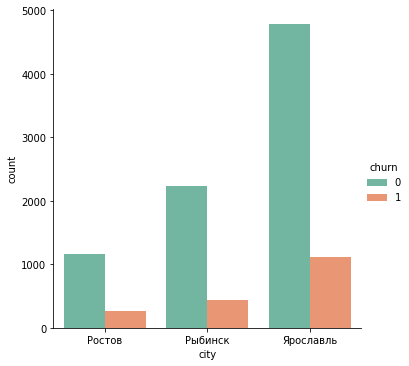

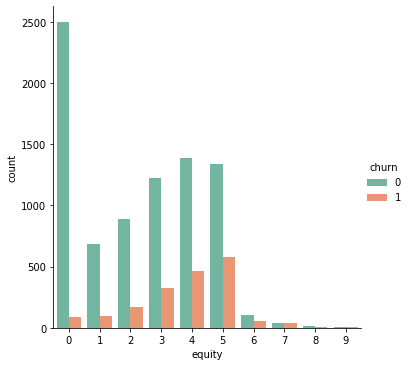

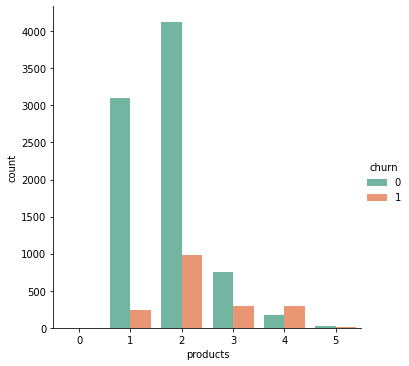

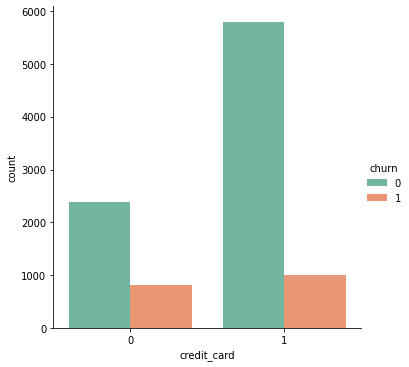

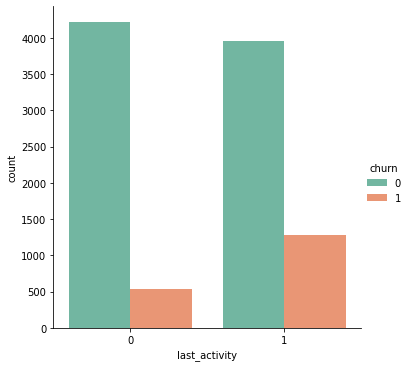

In [48]:
df_list = ['gender', 'city', 'equity', 'products', 'credit_card', 'last_activity']

for i in df_list:
    sample = df.groupby([i,'churn'])['churn'].count()
    sample.name = 'count'
    sample = sample.reset_index().sort_values(by='churn', ascending=False)
    sns.catplot(data=sample, kind='bar', x=i, y='count', hue='churn', palette='Set2')



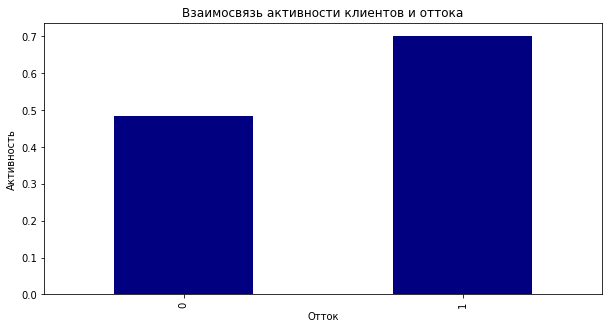

In [49]:
df.groupby('churn')['last_activity'].mean().plot(kind='bar', figsize=(10,5), color=['navy'])\
                    .set_title('Взаимосвязь активности клиентов и оттока') 
plt.xlabel('Отток') 
plt.ylabel('Активность') 
plt.show()

###### Среди ушедших клиентов больше активных.

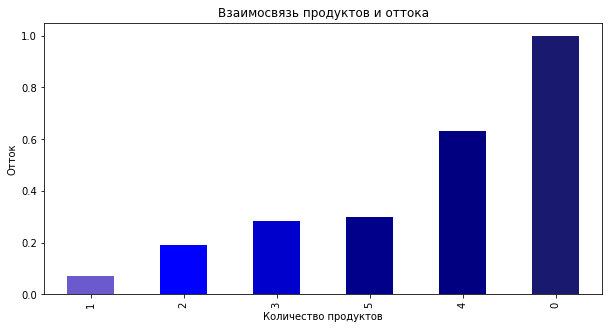

In [50]:
df.groupby('products')['churn'].mean()\
                               .sort_values()\
                               .plot(kind='bar', figsize=(10,5), color=['slateblue', 
                                                                        'blue', 
                                                                        'mediumblue',
                                                                        'darkblue',
                                                                        'navy',
                                                                        'midnightblue'])\
                               .set_title('Взаимосвязь продуктов и оттока') 
plt.xlabel('Количество продуктов') 
plt.ylabel('Отток') 
plt.show()

###### Клиентов, имеющих 0 продуктов, ушло больше чем тех кто имел 4. Меньше всего ушли с 1 продуктом.

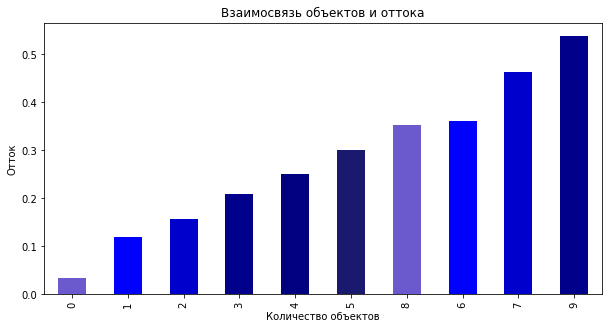

In [51]:
df.groupby('equity')['churn'].mean()\
                             .sort_values()\
                             .plot(kind='bar', figsize=(10,5), color=['slateblue', 
                                                                      'blue', 
                                                                      'mediumblue',
                                                                      'darkblue',
                                                                      'navy',
                                                                      'midnightblue'])\
                               .set_title('Взаимосвязь объектов и оттока') 
plt.xlabel('Количество объектов') 
plt.ylabel('Отток') 
plt.show()

###### Чаще всего уходят клиенты с 9, 7 и 6 объектами. Меньше всего с 0 и 1 объектом.

In [52]:
df.query("churn == 1").equity.value_counts().sort_index()

0     90
1     93
2    166
3    323
4    465
5    577
6     58
7     37
8      6
9      7
Name: equity, dtype: int64

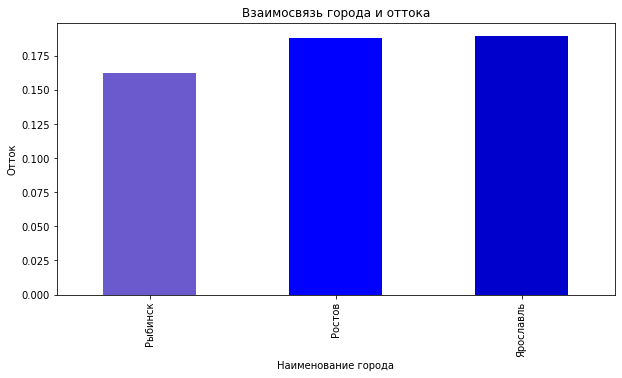

In [53]:
df.groupby('city')['churn'].mean()\
                           .sort_values()\
                           .plot(kind='bar', figsize=(10,5), color=['slateblue', 
                                                                    'blue', 
                                                                    'mediumblue'])\
                           .set_title('Взаимосвязь города и оттока') 
plt.xlabel('Наименование города') 
plt.ylabel('Отток') 
plt.show()

###### Среди ушедших жителей Ярославля больше всего, и почти на одном уровне жители Ростова.

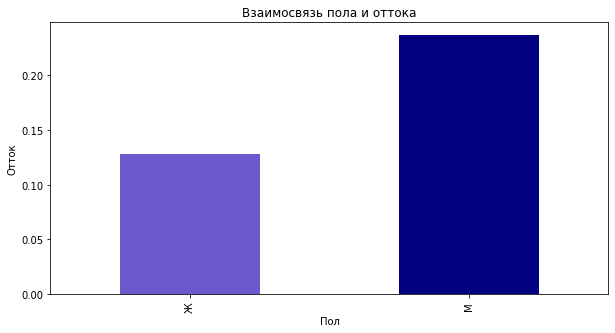

In [54]:
df.groupby('gender')['churn'].mean().plot(kind='bar', figsize=(10,5), color=['slateblue','navy'])\
                    .set_title('Взаимосвязь пола и оттока') 
plt.xlabel('Пол') 
plt.ylabel('Отток') 
plt.show()

###### Мужчин ушло больше, чем женщин.

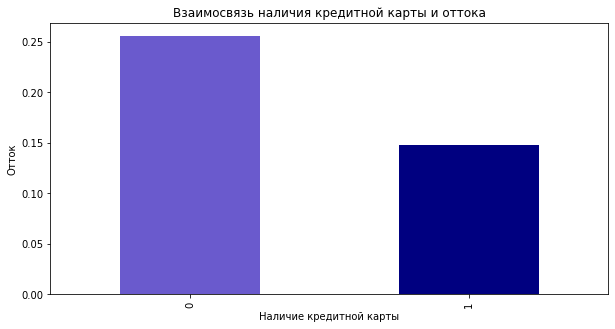

In [55]:
df.groupby('credit_card')['churn'].mean().plot(kind='bar', figsize=(10,5), color=['slateblue','navy'])\
                    .set_title('Взаимосвязь наличия кредитной карты и оттока') 
plt.xlabel('Наличие кредитной карты') 
plt.ylabel('Отток') 
plt.show()

###### Отток выше среди тех, кто не имеет кредитную карту. 

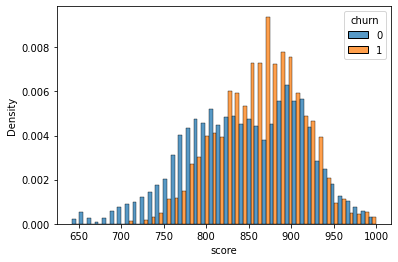

In [57]:
sns.histplot(data=df, x='score', hue='churn', multiple='dodge', stat='density', common_norm=False);

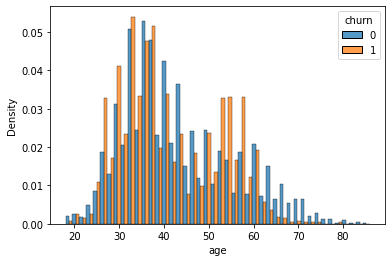

In [58]:
sns.histplot(data=df, x='age', hue='churn', multiple='dodge', stat='density', common_norm=False);

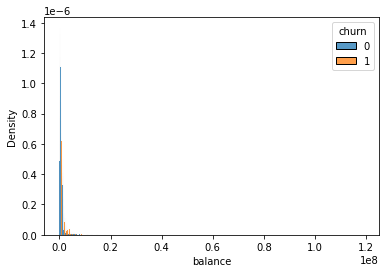

In [59]:
sns.histplot(data=df, x='balance', hue='churn', multiple='dodge', stat='density', common_norm=False);

In [60]:
fig = px.histogram(df, x='balance', color='churn', histnorm='probability',barmode ='overlay', range_x=['0','10000000'])
fig.show()

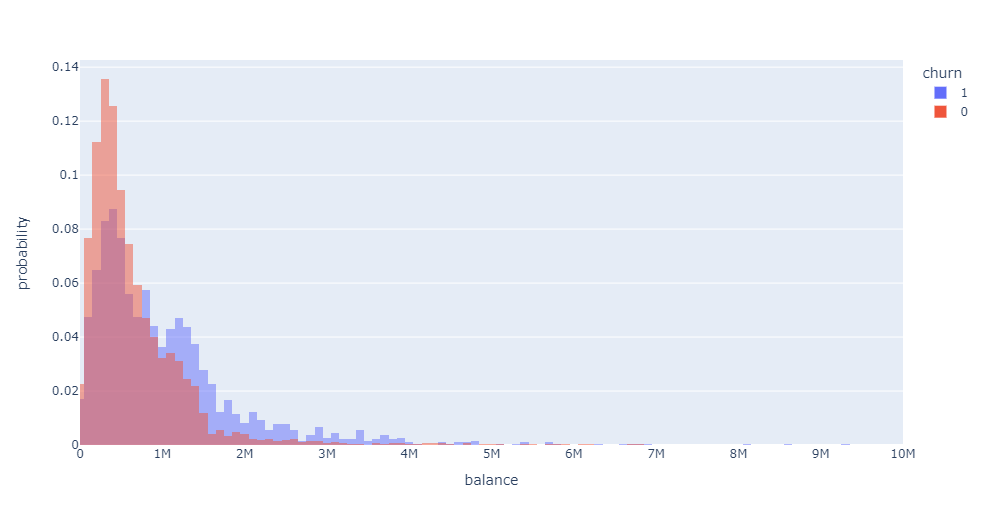

###### наблюдается с увеличением баланса на счету увеличение процента ушедших. 

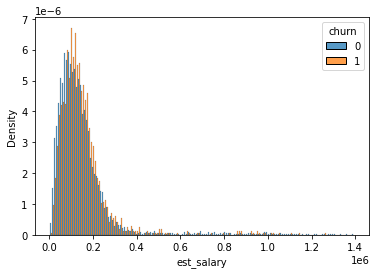

In [61]:
sns.histplot(data=df, x='est_salary', hue='churn', multiple='dodge', stat='density', common_norm=False);

###### По полу мужчин ушло больше чем женщин, более 1000 против 500 женщин. Осталось мужчин меньше чем женщин. Больше 3800 мужчин, 4200 примерно женщин.  
###### По городам больше всего ушло в Ярославле и также больше всего осталось. Далее идут Рыбинск и меньше всего ушло и осталось в Ростове.  
###### По собственности, больше всего ушло клиентов, которые имеют в собственности 5 каких-либо вещей. Дальше по нисходящей идут те у кого 4 вещи, 3 вещи, 2 вещи и 1 вещь. Примечательно, что те у кого более 6 каких-либо вещей - они уходят меньше всех. Больше всех кто остается в банке - это те кто не имеет вообще ни одной вещи - 2500. Потом те, кто имеют 4 вещи (почти 1500), 5 вещей (1400) и по нисходящей по 3(1250), 2(900), 1(700).  
###### По продуктам, больше всего тех кто ушел имели 2 продукта, и также те кто имеют два продукта их больше всего осталось. Далее идут на отток те у кого 4 продукта, потом 3 продукта, и 1. Меньше всех кто уходит имеют 5 продуктов. Зато остаются после 2-х продуктов больше всех те, кто имеют 1 продукт. Потом 3 продукта, и 4. Те кто имеют 5 продуктов также меньше всего.  
###### По кредитным картам уходят больше те кто имеют карты, чем те кто не имеют. Также и остаются в банке те, кто имеют кредитку.  
###### Ушло больше тех кто имел последнюю активность, а осталось больше тех, кто не заходил в последнее время.   
###### По скору ушедших больше среди тех, кто имел высокий рейтинг. Банк явно теряет хороших платежеспособных клиентов.  
###### По возрасту тоже наблюдается динамика на отток именно взрослого и работоспособного сегмента, 30 летние, 40-летние. Их отток выше чем те кто остался.  
###### По балансу наблюдаются выбросы, и при увеличении баланса виден отток. Но большинство пока остается.  
###### По зарплате есть отрезок где уходят больше, чем остаются. Но с увеличением зарплаты разницы почти нет между теми кто уходит и теми кто остается. 

#### Изучим теперь уходящих и оставшихся разделив их по категориям

In [62]:
df_churn = df.loc[df['churn'] == 1]
df_stay = df.loc[df['churn'] == 0]

In [63]:
df_gender = df_churn.groupby(['gender'])['churn'].count()
df_gender.name = 'count'
df_gender = df_gender.reset_index().sort_values(by='count', ascending=False)
fig = px.histogram(df_gender,
                   x='gender',
                   y='count',
                   color='gender', 
                   title='Распределение отточных по полу',
                   nbins=70, 
                   barmode='overlay')
fig.update_xaxes(title_text='Пол') 
fig.update_yaxes(title_text='Количество')
fig.show() 


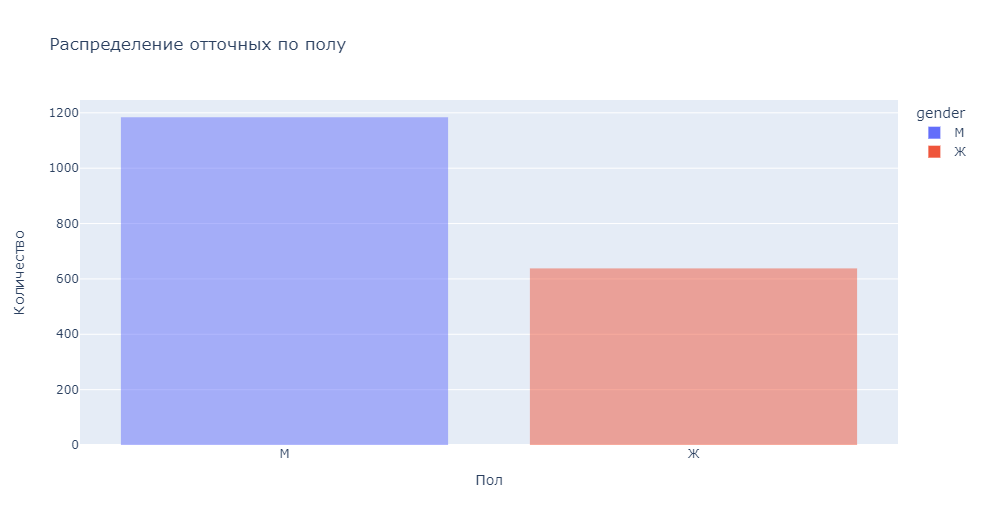

In [64]:
df_gender_stay = df_stay.groupby(['gender'])['churn'].count()
df_gender_stay.name = 'count'
df_gender_stay = df_gender_stay.reset_index().sort_values(by='count', ascending=False)
fig = px.histogram(df_gender_stay,
                   x='gender',
                   y='count',
                   color='gender', 
                   title='Распределение неотточных по полу',
                   nbins=70, 
                   barmode='overlay')
fig.update_xaxes(title_text='Пол') 
fig.update_yaxes(title_text='Количество')
fig.show() 

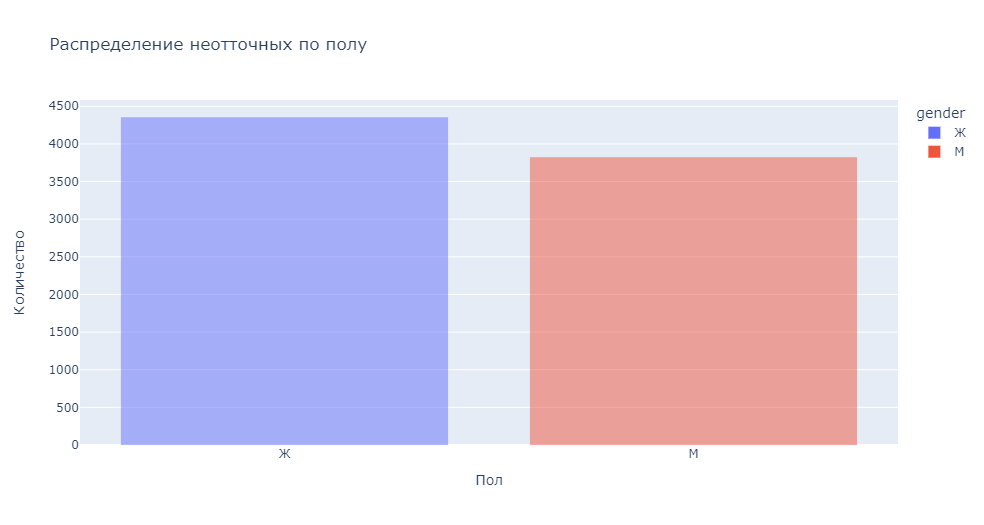

###### Рисуем портрет. Мужчин уходит больше из нашего банка, а остается меньше. Женщин уже больше по оставшимся

In [65]:
df_card = df_churn.groupby(['credit_card'])['churn'].count()
df_card.name = 'count'
df_card = df_card.reset_index().sort_values(by='count', ascending=False)
df_card = df_card.replace({'credit_card':{1:'да', 0:'нет'}})

fig = px.histogram(df_card,
                   x='credit_card',
                   y='count',
                   color='credit_card', 
                   title='Распределение отточных по кредитным картам',
                   nbins=5, 
                   barmode='overlay')
fig.update_xaxes(title_text='Наличие кредитных карт') 
fig.update_yaxes(title_text='Количество')
fig.show() 

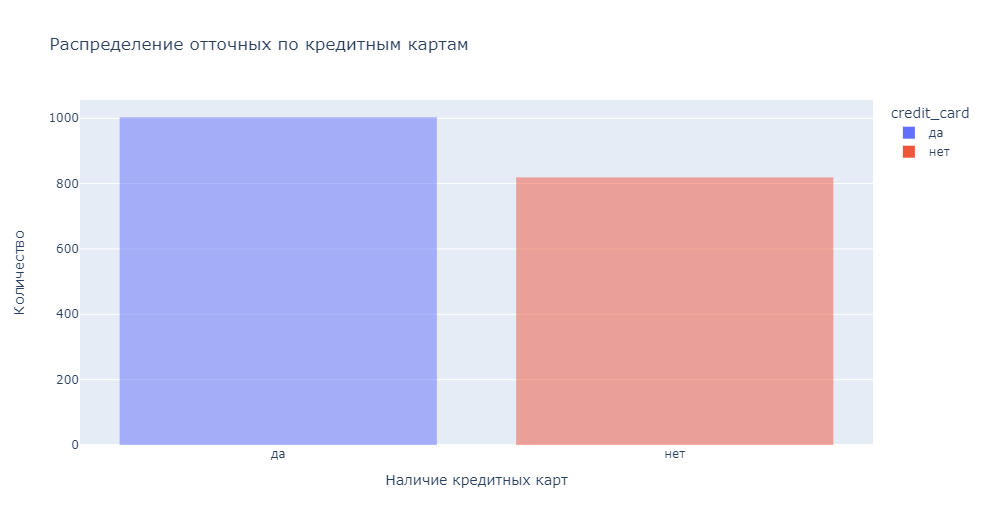

In [66]:
df_card_stay = df_stay.groupby(['credit_card'])['churn'].count()
df_card_stay.name = 'count'
df_card_stay = df_card_stay.reset_index().sort_values(by='count', ascending=False)
df_card_stay = df_card_stay.replace({'credit_card':{1:'да', 0:'нет'}})

fig = px.histogram(df_card_stay,
                   x='credit_card',
                   y='count',
                   color='credit_card', 
                   title='Распределение неотточных по кредитным картам',
                   nbins=5, 
                   barmode='overlay')
fig.update_xaxes(title_text='Наличие кредитных карт') 
fig.update_yaxes(title_text='Количество')
fig.show() 

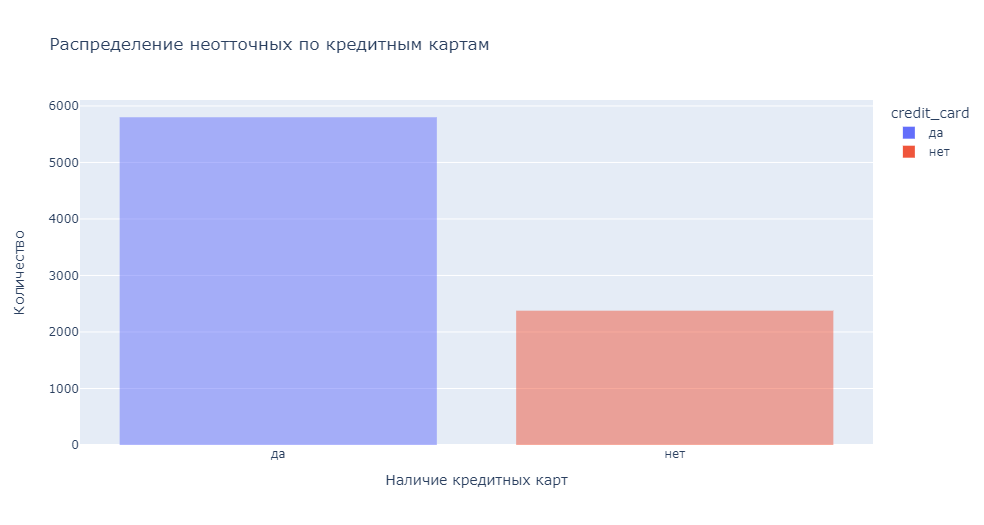

###### Наличие кредитной карты не останавливает клиентов от ухода. Им видимо все равно,есть она или нет, потому что среди тех кто остается тоже большинство с картами.

In [67]:
df_last = df_churn.groupby(['last_activity'])['churn'].count()
df_last.name = 'count'
df_last = df_last.reset_index().sort_values(by='count', ascending=False)
df_last = df_last.replace({'last_activity':{1:'да', 0:'нет'}})

fig = px.histogram(df_last,
                   x='last_activity',
                   y='count',
                   color='last_activity', 
                   title='Распределение отточных по активности (была или нет в последнее время)',
                   nbins=5, 
                   barmode='overlay')
fig.update_xaxes(title_text='Была активность в последнее время') 
fig.update_yaxes(title_text='Количество')
fig.show() 

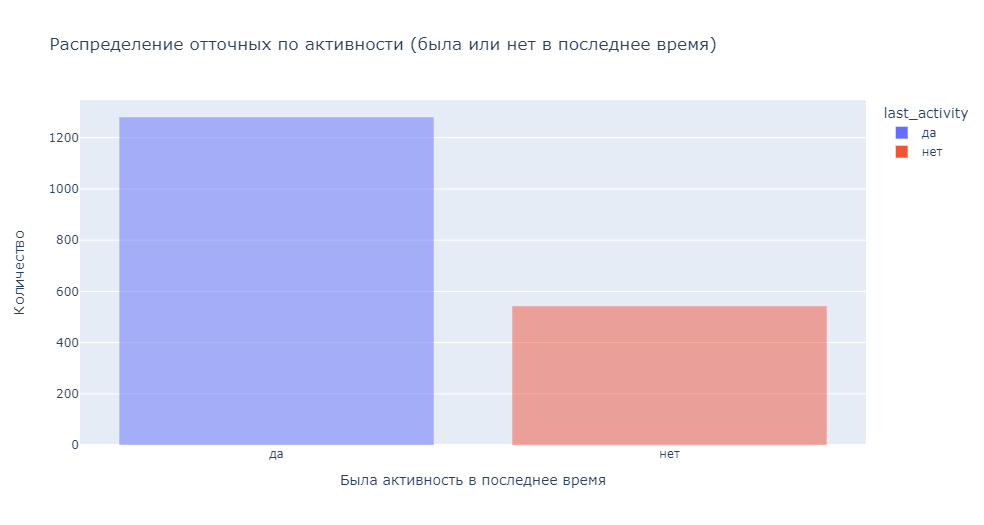

In [68]:
df_last_stay = df_stay.groupby(['last_activity'])['churn'].count()
df_last_stay.name = 'count'
df_last_stay = df_last_stay.reset_index().sort_values(by='count', ascending=False)
df_last_stay = df_last_stay.replace({'last_activity':{1:'да', 0:'нет'}})

fig = px.histogram(df_last_stay,
                   x='last_activity',
                   y='count',
                   color='last_activity', 
                   title='Распределение неотточных по активности (была или нет в последнее время)',
                   nbins=5, 
                   barmode='overlay')
fig.update_xaxes(title_text='Была активность в последнее время') 
fig.update_yaxes(title_text='Количество')
fig.show()

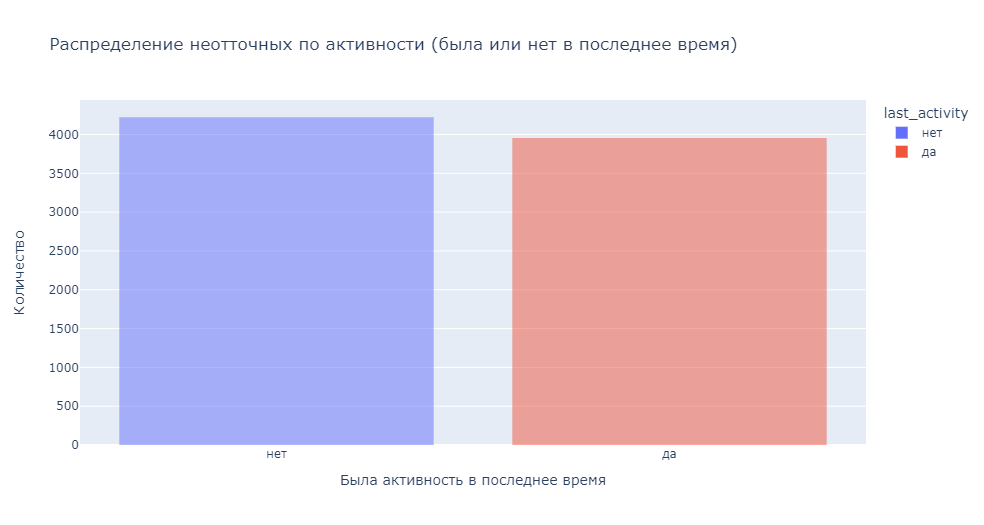

###### Больше тех кто совершал какую-либо активность из тех кто ушел. Интересно, что те кто остался большинство как раз таки не проявляли активность. Может повышенная активность связана как раз таки с тем, что нужно снимать деньги/переводить, закрывать счета или продукты. Поэтому активность увеличивается среди тех, кто ушел. 

In [69]:
df_city = df_churn.groupby(['city'])['churn'].count()
df_city.name = 'count'
df_city = df_city.reset_index().sort_values(by='count', ascending=False)
fig = go.Figure(data=[go.Pie(labels=df_city['city'], 
                             values=df_city['count'], 
                             pull = [0.1, 0])]) 
fig.update_layout(title='Распределение ушедших по городам', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Наименование города',
                                    showarrow=False)])
fig.show() 

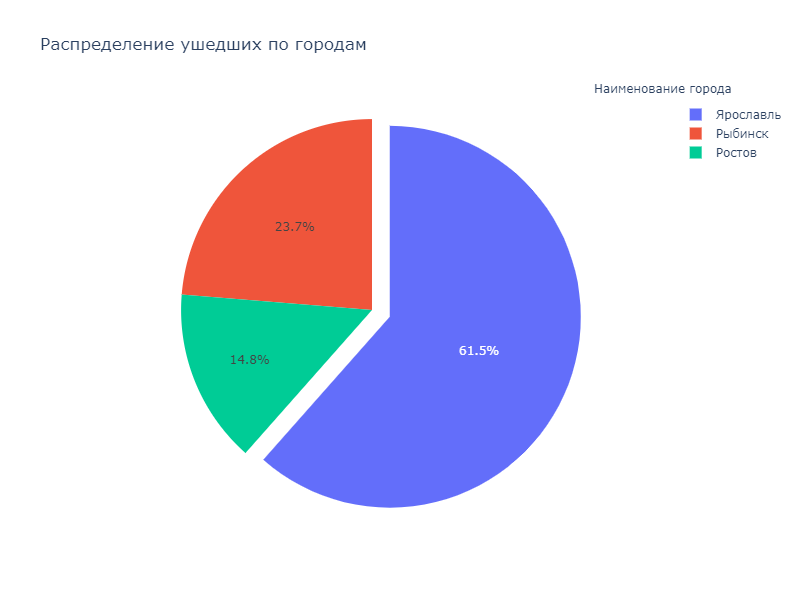

In [70]:
df_city_stay = df_stay.groupby(['city'])['churn'].count()
df_city_stay.name = 'count'
df_city_stay = df_city_stay.reset_index().sort_values(by='count', ascending=False)
fig = go.Figure(data=[go.Pie(labels=df_city_stay['city'], 
                             values=df_city_stay['count'], 
                             pull = [0.1, 0])]) 
fig.update_layout(title='Распределение оставшихся по городам', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Наименование города',
                                    showarrow=False)])
fig.show() 

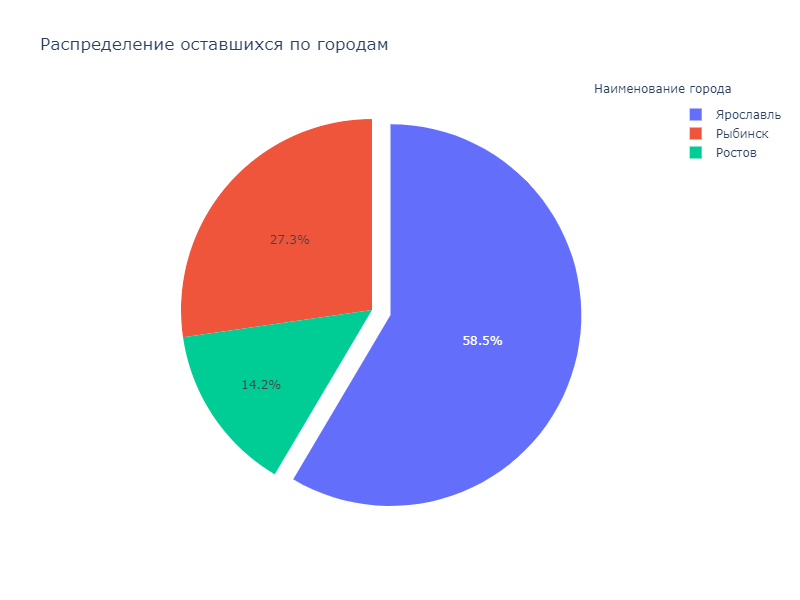

###### Больше всего ушло с Ярославля (центрального города) и больше всего же и осталось. Причем почти равные доли по ушедшим и оставшимся у Ростова и Рыбинска.

In [71]:
df_equity = df_churn.groupby(['equity'])['churn'].count()
df_equity.name = 'count'
df_equity = df_equity.reset_index().sort_values(by='count', ascending=False)
fig = go.Figure(data=[go.Pie(labels=df_equity['equity'], 
                             values=df_equity['count'], 
                             pull = [0.1, 0])]) 
fig.update_layout(title='Распределение ушедших по количеству в собственности имущества', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Количество имущества',
                                    showarrow=False)])
fig.show()

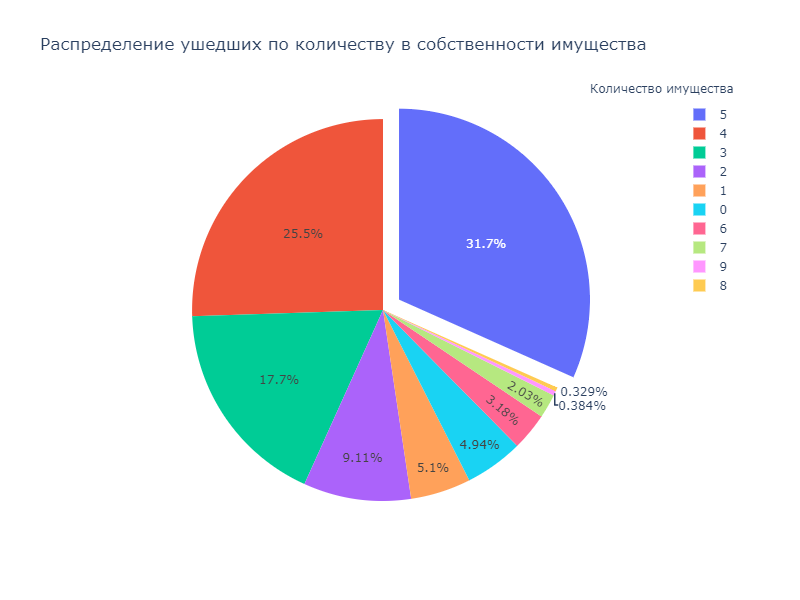

In [72]:
df_equity_stay = df_stay.groupby(['equity'])['churn'].count()
df_equity_stay.name = 'count'
df_equity_stay = df_equity_stay.reset_index().sort_values(by='count', ascending=False)
fig = go.Figure(data=[go.Pie(labels=df_equity_stay['equity'], 
                             values=df_equity_stay['count'], 
                             pull = [0.1, 0])]) 
fig.update_layout(title='Распределение оставшихся по количеству в собственности имущества', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Количество имущества',
                                    showarrow=False)])
fig.show()

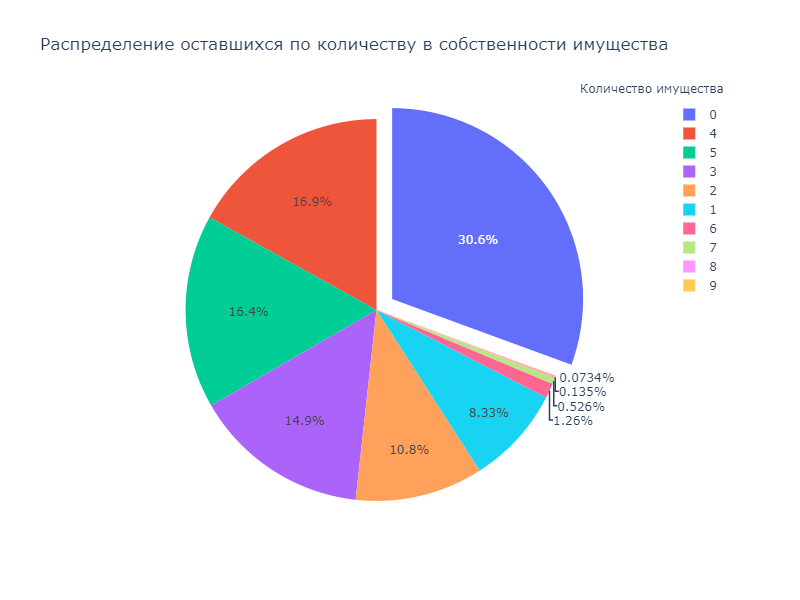

###### Большиство тех кто ушел, имели 5 различных видов имущества, а среди оставшихся большинство вообще без имущества. Причем те кто имеет 5 объектов среди оставшихся занимают только третье место в распределении.

In [73]:
df_products = df_churn.groupby(['products'])['churn'].count()
df_products.name = 'count'
df_products = df_products.reset_index().sort_values(by='count', ascending=False)
fig = go.Figure(data=[go.Pie(labels=df_products['products'], 
                             values=df_products['count'], 
                             pull = [0.1, 0])]) 
fig.update_layout(title='Распределение ушедших по количеству продуктов', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Количество продуктов',
                                    showarrow=False)])
fig.show()

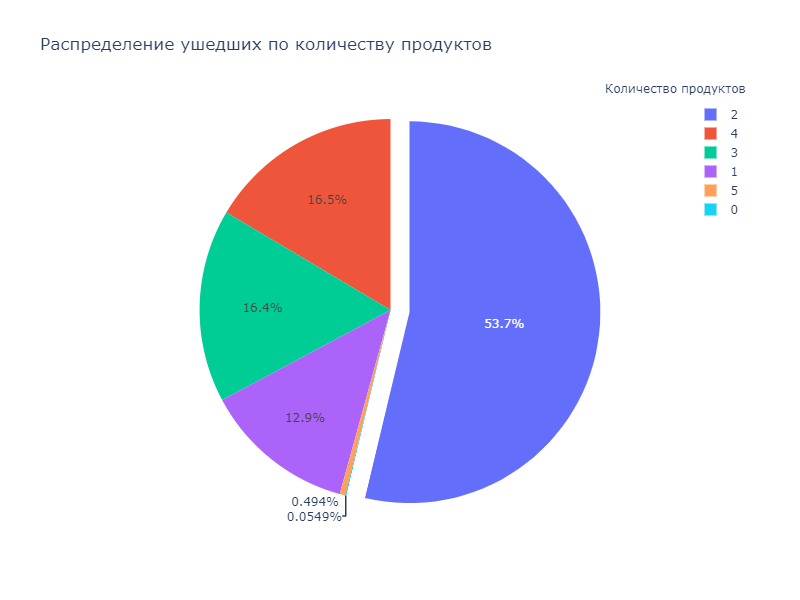

In [74]:
df_products_stay = df_stay.groupby(['products'])['churn'].count()
df_products_stay.name = 'count'
df_products_stay = df_products_stay.reset_index().sort_values(by='count', ascending=False)
fig = go.Figure(data=[go.Pie(labels=df_products_stay['products'], 
                             values=df_products_stay['count'], 
                             pull = [0.1, 0])]) 
fig.update_layout(title='Распределение оставшихся по количеству продуктов', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Количество продуктов',
                                    showarrow=False)])
fig.show()

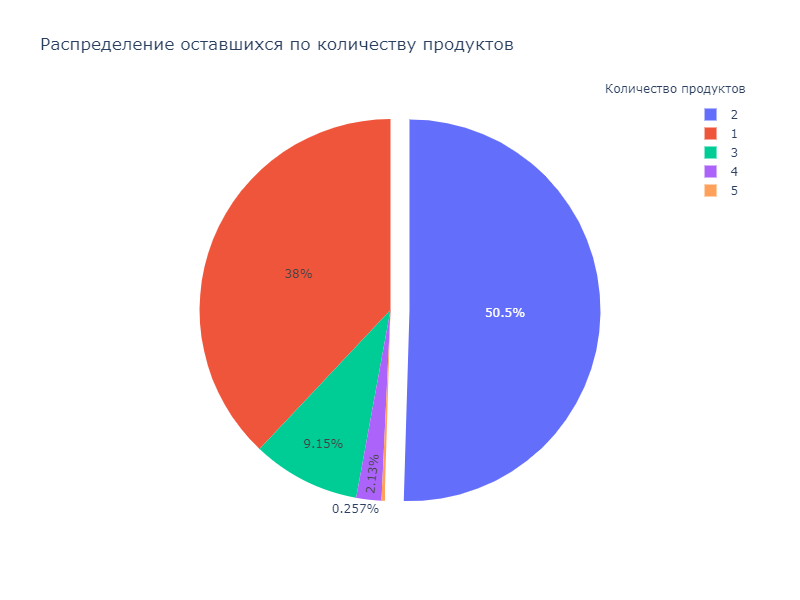

###### Больше всего из ушедших имели 2 продукта и оставшиеся тоже ровно половину имеют 2 продукта. 

###### Таким образом портрет клиента, который ушел вырисовывается следующий : мужчина который имеет кредитную карту, в последнее время проявляли активность, проживающий в Ярославле, владеющий 5 или 4 видами имущества и имеющий 2 продукта в этом банке.  
###### При этом можно выделить такие признаки как пол, имущество и последняя активность, которая может быть связана с оттоком.
###### По всем признакам вырисовывается достаточно активный и состоятельный клиент. Вообще у меня сразу появляется теория, что на лицо явный пробел работы с постоянными и повторными клиентами. Очень хорошо работает (возможно) фронт офис с привлечением, а вот уже дальше возникают проблемы. Причем скорее всего в том плане, что клиента развивают до какого-то "уровня", он доходит скажем до 2-х продуктов, пользуется кредиткой и дальше уже приходит или разочарование или потеря интереса и клиент уходит. 

#### Теперь проведем корреляционный анализ

In [75]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_nan', 'city_cop_Ростов', 'city_cop_Рыбинск', 'city_cop_Ярославль', 'gender_cop_Ж', 'gender_cop_М']


user_id  score  city  gender   age  equity  balance  \
user_id                1.00   0.06  0.03    0.06  0.00    0.07     0.03   
score                  0.06   1.00  0.09    0.07  0.04    0.53     0.17   
city                   0.03   0.09  1.00    0.01  0.09    0.07     0.04   
gender                 0.06   0.07  0.01    1.00  0.31    0.06     0.05   
age                    0.00   0.04  0.09    0.31  1.00    0.09     0.03   
equity                 0.07   0.53  0.07    0.06  0.09    1.00     0.00   
balance                0.03   0.17  0.04    0.05  0.03    0.00     1.00   
products               0.07   0.31  0.23    0.12  0.13    0.44     0.00   
credit_card            0.04   0.21  0.08    0.20  0.17    0.22     0.00   
last_activity          0.07   0.05  0.03    0.01  0.08    0.05     0.00   
est_salary             0.00   0.40  0.17    0.14  0.37    0.29     0.37   
churn                  0.14   0.23  0.02    0.22  0.19    0.35     0.02   
balance_nan            0.04   0.75  0.04    0.10  0.08    0.98      NaN   
city_cop_Ростов        0.04   0.09  1.00    0.02  0.06    0.06     0.00   
city_cop_Рыбинск       0.00   0.03  1.00    0.01  0.06    0.01     0.02   
city_cop_Ярославль     0.00   0.09  1.00    0.03  0.10    0.06     0.05   
gender_cop_Ж           0.06   0.07  0.01    1.00  0.31    0.06     0.05   
gender_cop_М           0.06   0.07  0.01    1.00  0.31    0.06     0.05   

                    products  credit_card  last_activity  est_salary  churn  \
user_id                 0.07         0.04           0.07        0.00   0.14   
score                   0.31         0.21           0.05        0.40   0.23   
city                    0.23         0.08           0.03        0.17   0.02   
gender                  0.12         0.20           0.01        0.14   0.22   
age                     0.13         0.17           0.08        0.37   0.19   
equity                  0.44         0.22           0.05        0.29   0.35   
balance                 0.00         0.00           0.00        0.37   0.02   
products                1.00         0.46           0.19        0.16   0.44   
credit_card             0.46         1.00           0.05        0.04   0.20   
last_activity           0.19         0.05           1.00        0.05   0.26   
est_salary              0.16         0.04           0.05        1.00   0.05   
churn                   0.44         0.20           0.26        0.05   1.00   
balance_nan             0.79         0.25           0.04        0.43   0.38   
city_cop_Ростов         0.08         0.15           0.00        0.14   0.00   
city_cop_Рыбинск        0.15         0.08           0.07        0.10   0.05   
city_cop_Ярославль      0.19         0.18           0.07        0.18   0.03   
gender_cop_Ж            0.12         0.20           0.01        0.14   0.22   
gender_cop_М            0.12         0.20           0.01        0.14   0.22   

                    balance_nan  city_cop_Ростов  city_cop_Рыбинск  \
user_id                    0.04             0.04              0.00   
score                      0.75             0.09              0.03   
city                       0.04             1.00              1.00   
gender                     0.10             0.02              0.01   
age                        0.08             0.06              0.06   
equity                     0.98             0.06              0.01   
balance                     NaN             0.00              0.02   
products                   0.79             0.08              0.15   
credit_card                0.25             0.15              0.08   
last_activity              0.04             0.00              0.07   
est_salary                 0.43             0.14              0.10   
churn                      0.38             0.00              0.05   
balance_nan                1.00             0.09              0.02   
city_cop_Ростов            0.09             1.00              0.38   
city_cop_Рыбинск           0.02           

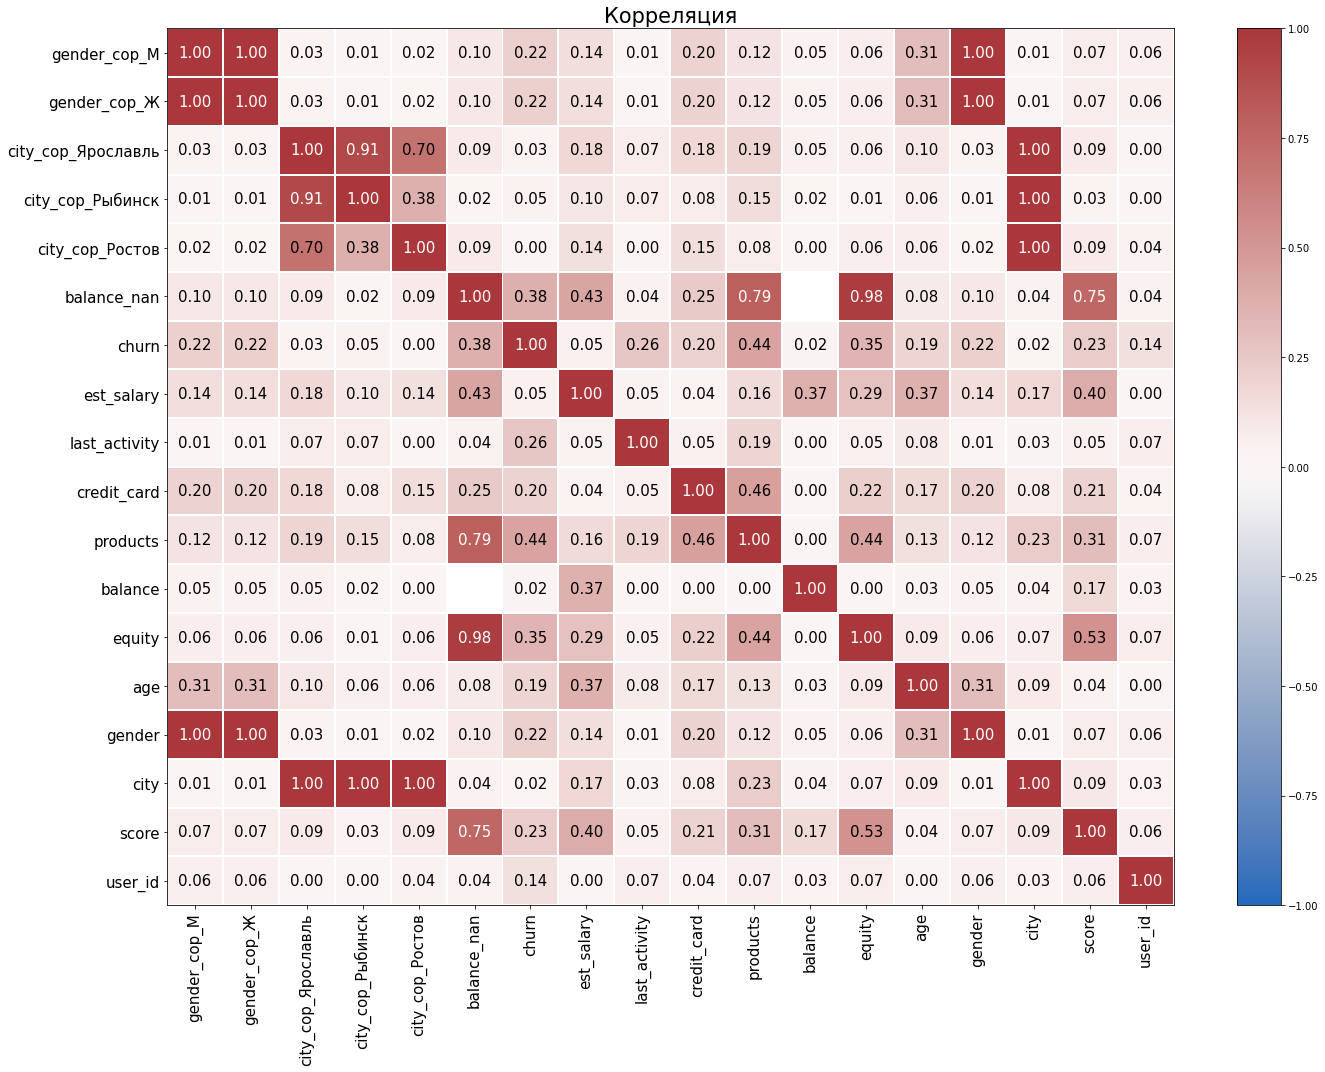

In [76]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=-1, vmax=1, color_map='vlag', 
                        title=r'Корреляция', 
                        fontsize_factor=1.5, 
                        figsize=(20, 15))
plt.tight_layout()

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_nan', 'city_cop_Ростов', 'city_cop_Рыбинск', 'city_cop_Ярославль', 'gender_cop_Ж', 'gender_cop_М']


/opt/conda/lib/python3.9/site-packages/phik/significance.py:343: UserWarning:

Too few unique values for variable balance (6) or balance_nan (1) to calculate significance



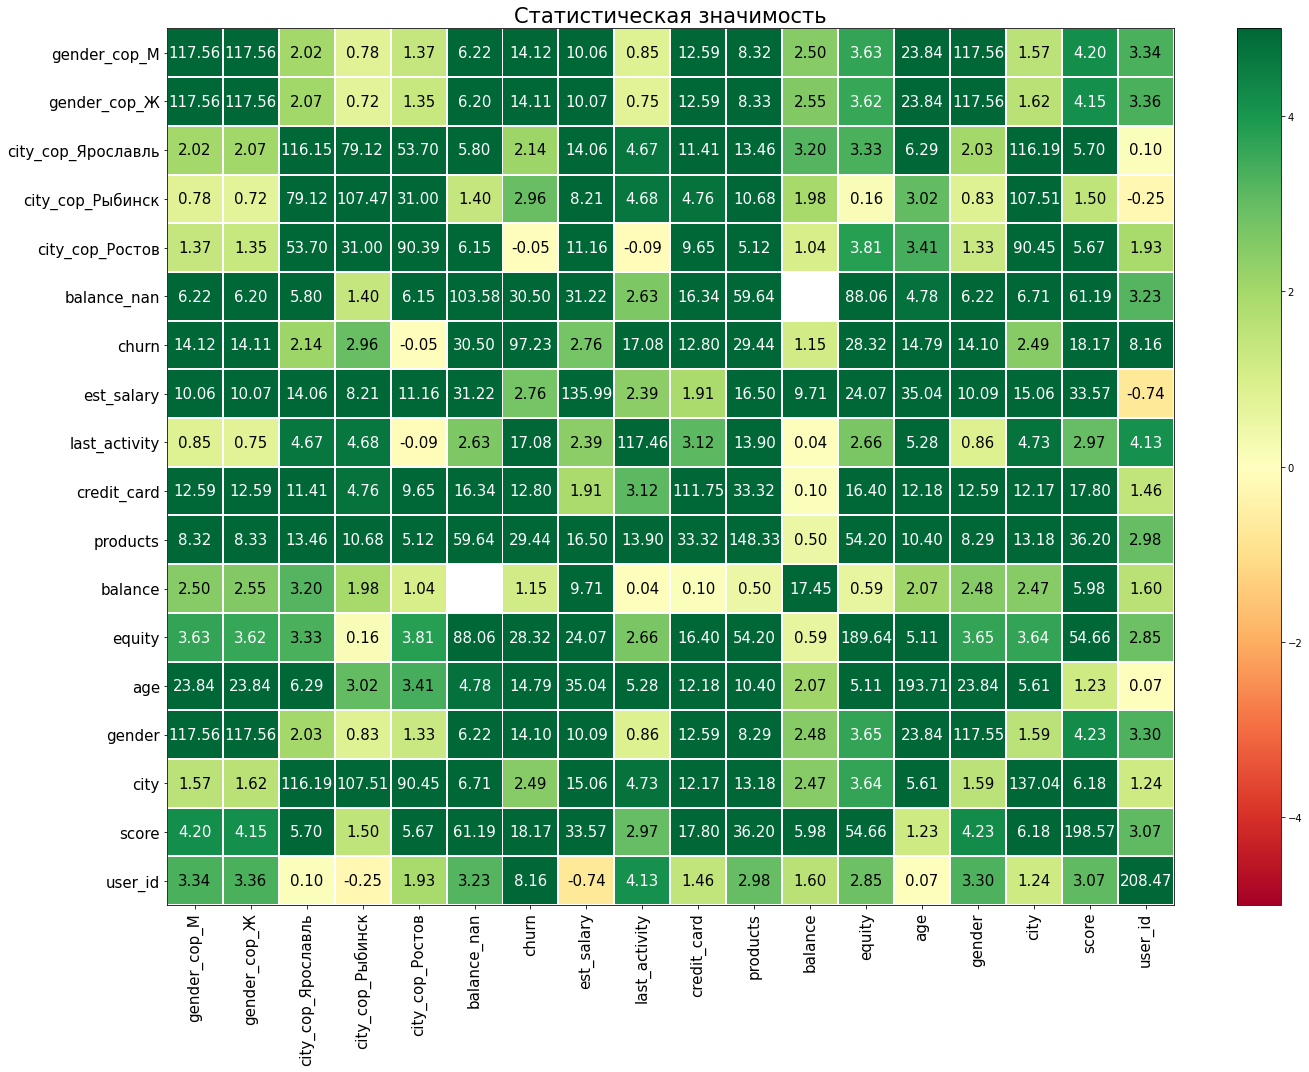

In [77]:
significance_overview = df.significance_matrix()
plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title='Статистическая значимость', 
                        usetex=False, fontsize_factor=1.5, figsize=(20, 15))
plt.tight_layout()

###### Мы видим, в соответствии с матрицей умеренную кореляцию между продуктом и уходом (0.44), имуществом и уходом (0.35) и последняя активность с уходом (0.26).  
###### Также присутствует заметная взаимосвязь между имуществом и скорринговой оценкой (0.53), между продуктом и имуществом (0.44), и зарплаты с скоринговой оценкой (0.40). Здесь впринципе логично, скорринговая оценка обычно учитывает имущество и зарплату клиента. В части продукта и имущества тоже можно предположить, что взависимости от имущества (наличия и конкретики) подбирается продукт или наоборот выбирается продукт для приобретения имущества.  
###### Проверив статистическую значимость мы видим подтверждение корреляции ,а именно кореляция между продуктом и уходом, имуществом и уходом и последняя активность с уходом статистически значима (29.45, 28.34, 17.10 соответственно).  

### Перейдем к проверке гипотез

#### Сформулируем нулевую и альтернативную гипотезу по различию дохода между теми клиентами, которые ушли и теми, которые остались:  

Н0: Доходы тех клиентов, что ушли и тех, которые остались равны.  
Н1: Доходы тех клиентов, что ушли и тех, которые остались различны.  

Всегда нулевая гипотеза формулируется как равенство утверждения. В данном случае мы доказываем что доход ушедщих клиентов == доходу тех кто остались. В случае если это не так, альтернативная гипотеза звучит как не равенство доходов клиентов в зависимости от их статуса. 

In [78]:
#определимся с методом проверки и сделаем срез по тем кто остался и ушел.
df_stay = df.loc[df['churn'] == 0]
df_stay.head(5)

user_id  score       city gender  age  equity    balance  products  \
1   146556  861.0    Рыбинск      Ж   37       5  850594.33         3   
2   120722  892.0    Рыбинск      Ж   30       0        NaN         1   
5   202305  856.0    Рыбинск      М   56       4  863687.24         3   
6   177259  807.0  Ярославль      Ж   39       3  405042.44         3   
7   218868  825.0  Ярославль      Ж   38       4  458145.40         2   

   credit_card  last_activity  est_salary  churn  balance_nan  \
1            1              0    86621.77      0            1   
2            1              1   107683.34      0            0   
5            1              0   156619.80      0            1   
6            0              1   103838.32      0            1   
7            1              1    68085.48      0            1   

   city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  gender_cop_Ж  \
1                0                 1                   0             1   
2                0                 1                   0             1   
5                0                 1                   0             0   
6                0                 0                   1             1   
7                0                 0                   1             1   

   gender_cop_М  
1             0  
2             0  
5             1  
6             0  
7             0

<AxesSubplot:>

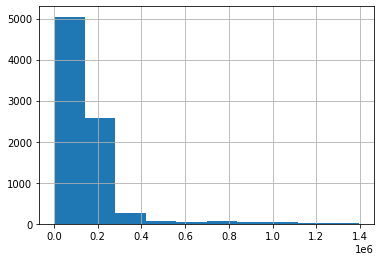

In [79]:
df_stay['est_salary'].hist()

<AxesSubplot:>

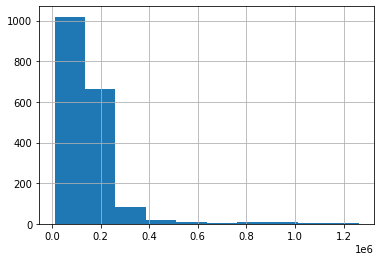

In [80]:
df_churn['est_salary'].hist()

###### Так как данные имеют "не нормальное" распределение, группы независимы, и у нас 2 группы, то я буду использовать критерий Манна-Уитни

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;📌<br>
Так как выборки большие, то нам неважно, что они распределены ненормально, мы могли бы использовать t-критерий, если бы не другие причины. Требование нормальности распределения происходит из медицинской литературы, где традиционно маленькие выборки. 
    
Цитирую теорию (Спринт 5, Тема 4/6, Проверка гипотез):
<blockquote>Выборочные средние должны быть нормально распределены.
А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Напомним, это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

Очень часто это условие путают с необходимостью нормального распределения самих генеральных совокупностей. Для корректного использования t-теста это необязательно.</blockquote>
Таким образом нормальное распределение для выборок более 30-50 элементов не требуется для t-теста. Требуется отсутствие большого числа выбросов.

При разном размере выборок, который нам тут известен мы ставим equal_var в положение False просто из-за особенностей работы метода ttest_ind. И вообще, надёжнее при любых сомнениях ставить его в это положение, это лишь немного снижает мощность данного стат критерия. В среднем у u-критерия Манна-Уитни мощность выше, чем у t-критерия, т.е. он чаще даёт более точный результат. В литературе встречаются утверждения, что его нельзя проводить, если есть значительное число повторяющихся значений или если выборки большие, однако это относится, видимо, к старым реализациям теста.
</div>

In [81]:
alpha = 0.05 

results = st.mannwhitneyu(df_churn['est_salary'], df_stay['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Доходы тех клиентов, что ушли и тех, которые остались различны')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу: Доходы тех клиентов, что ушли и тех, которые остались равны'
    )


p-значение:  0.0002499111605569152
Отвергаем нулевую гипотезу: Доходы тех клиентов, что ушли и тех, которые остались различны


#### Сформируем вторую гипотезу по различию количества продуктов у тех кто ушел и у тех кто остался:  
  
Н0: Количество продуктов тех клиентов, что ушли и тех, которые остались равны.  
Н1: Количество продуктов тех клиентов, что ушли и тех, которые остались различны.  

Всегда нулевая гипотеза формулируется как равенство утверждения. В данном случае мы доказываем что количество продуктов  ушедщих клиентов == количеству продуктов тех кто остались. В случае если это не так, альтернативная гипотеза звучит как не равенство количества продуктов клиентов в зависимости от их статуса. 

<AxesSubplot:>

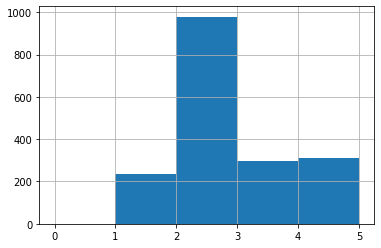

In [82]:
# определимся с методом проверки гипотезы
df_churn['products'].hist(bins=5)

<AxesSubplot:>

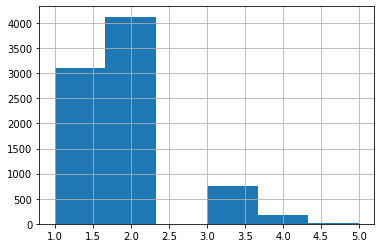

In [83]:
df_stay['products'].hist(bins=6)

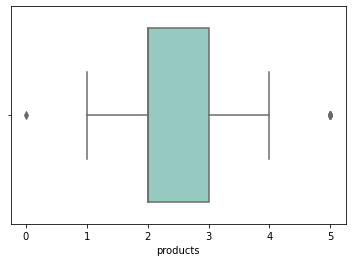

In [84]:
ax = sns.boxplot(x=df_churn['products'], palette='Set3')
plt.show()

In [85]:
df_churn['products'].describe()

count    1822.000000
mean        2.377607
std         0.925034
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: products, dtype: float64

In [86]:
df_churn['products'].value_counts()

2    979
4    300
3    298
1    235
5      9
0      1
Name: products, dtype: int64

In [87]:
# посчитаю долю выбросов
release = 10 / df_churn['products'].sum()
release

0.0023084025854108957

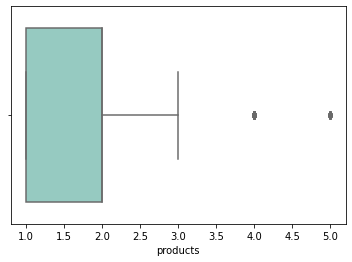

In [88]:
ax = sns.boxplot(x=df_stay['products'], palette='Set3')
plt.show()

In [89]:
df_stay['products'].describe()

count    8177.000000
mean        1.762015
std         0.723089
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64

In [90]:
df_stay['products'].value_counts()

2    4129
1    3105
3     748
4     174
5      21
Name: products, dtype: int64

In [91]:
# посчитаю долю выбросов 
release_s = 195 / df_stay['products'].sum()
release_s

0.013534147695724598

###### С учетом того, что при количестве элементов в выюорке более 30-50 мы не будем смотреть на распределение и в связи с тем, что доля выбросов в наших группах очень мала (в одной 1 %, в другой 0,02%) я буду использовать ttest.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🚫<br>
<s>Тут неверное обоснование по используемому стат. критерию.
</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
Готово!
</div>

In [92]:
results = st.ttest_ind(
    df_churn['products'],
    df_stay['products'],
    equal_var = False
)
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Количество продуктов тех клиентов, что ушли и тех, которые остались различны')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Количество продуктов тех клиентов, что ушли и тех, которые остались равны')

6.988444252914745e-137
Отвергаем нулевую гипотезу: Количество продуктов тех клиентов, что ушли и тех, которые остались различны


###### Проведенные выше два теста дали нам ясно понять, что обе нулевые гипотезы о равенстве доходов и количества продуктов необходимо отвергнуть. 

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;✔️<br>
Гипотезы сфомулированы верно, расчёты проведены и интерпретированы корректно
</div>

### Сегментация

In [93]:
df.head(5)

user_id  score       city gender  age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3   225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4   157978  730.0  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  balance_nan  \
0            0              1    75719.14      1            1   
1            1              0    86621.77      0            1   
2            1              1   107683.34      0            0   
3            0              1   174423.53      1            1   
4            1              0    67353.16      1            1   

   city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  gender_cop_Ж  \
0                0                 1                   0             1   
1                0                 1                   0             1   
2                0                 1                   0             1   
3                0                 0                   1             1   
4                0                 0                   1             0   

   gender_cop_М  
0             0  
1             0  
2             0  
3             0  
4             1

In [94]:
# мы выделили выше такие признаки как пол, последнюю активность, количество имущества Рассчитаем уровень оттока в их разрезе
# уровень оттока по полу(мужчины)
levels = df_churn['user_id'].count() / df['user_id'].count()
levels

0.18221822182218222

In [95]:
# уровень оттока по полу(мужчины)
level_man = df_churn['gender_cop_М'].sum() / df['gender_cop_М'].sum()
level_man

0.23646894347912922

In [96]:
# уровень оттока по полу(женщины)
level_w = df_churn['gender_cop_Ж'].sum() / df['gender_cop_Ж'].sum()
level_w

0.12780448717948717

In [97]:
# уровень оттока по имуществу
level_equity = df_churn['equity'].sum() / df['equity'].sum()
level_equity

0.2609605723854468

In [98]:
# уровень оттока по активности
level_activ = df_churn['last_activity'].sum() / df['last_activity'].sum()
level_activ

0.24450811843361986

In [99]:
# уровень оттока по активности (не заходил в аккаунт)
all_df = df.loc[df['last_activity'] == 0]
churn_df = df_churn.loc[df_churn['last_activity'] == 0]
level_pass = churn_df['last_activity'].count() / all_df['last_activity'].count()
level_pass

0.11376994122586062

In [100]:
# найдем первый сегмент
segment_1 = df.query('gender_cop_М == 1 and (equity > 4) and last_activity == 1')
level = segment_1['churn'].sum() / segment_1['churn'].count()
segment_1['user_id'].count()

597

In [101]:
level

0.542713567839196

In [102]:
segment_1.describe()

user_id        score         age      equity       balance  \
count     597.000000   597.000000  597.000000  597.000000  5.970000e+02   
mean   173936.078727   865.742044   40.462312    5.232831  1.568932e+06   
std     36997.515297    51.273747   10.650519    0.630112  5.496750e+06   
min     95384.000000   724.000000   19.000000    5.000000  9.459770e+03   
25%    144096.000000   827.000000   32.000000    5.000000  5.461839e+05   
50%    174090.000000   865.000000   38.000000    5.000000  8.481713e+05   
75%    208738.000000   902.000000   47.000000    5.000000  1.387696e+06   
max    229017.000000  1000.000000   72.000000    9.000000  1.191136e+08   

         products  credit_card  last_activity    est_salary       churn  \
count  597.000000   597.000000          597.0  5.970000e+02  597.000000   
mean     2.407035     0.582915            1.0  1.562713e+05    0.542714   
std      0.972862     0.493491            0.0  1.567055e+05    0.498590   
min      1.000000     0.000000            1.0  9.766130e+03    0.000000   
25%      2.000000     0.000000            1.0  7.489017e+04    0.000000   
50%      2.000000     1.000000            1.0  1.183509e+05    1.000000   
75%      3.000000     1.000000            1.0  1.804286e+05    1.000000   
max      5.000000     1.000000            1.0  1.263028e+06    1.000000   

       balance_nan  city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  \
count        597.0       597.000000        597.000000          597.000000   
mean           1.0         0.154104          0.283082            0.562814   
std            0.0         0.361351          0.450874            0.496455   
min            1.0         0.000000          0.000000            0.000000   
25%            1.0         0.000000          0.000000            0.000000   
50%            1.0         0.000000          0.000000            1.000000   
75%            1.0         0.000000          1.000000            1.000000   
max            1.0         1.000000          1.000000            1.000000   

       gender_cop_Ж  gender_cop_М  
count         597.0         597.0  
mean            0.0           1.0  
std             0.0           0.0  
min             0.0           1.0  
25%             0.0           1.0  
50%             0.0           1.0  
75%             0.0           1.0  
max             0.0           1.0

In [103]:
segment_2 = df.query('products > 3 and 9 > equity > 1')
level_2 = segment_2['churn'].sum() / segment_2['churn'].count()
segment_2['user_id'].count()

473

In [104]:
level_2

0.6215644820295984

In [105]:
segment_3 = df.query('products < 3 and last_activity == 1  and gender_cop_М == 1 and credit_card == 0') 
level_3 = segment_3['churn'].sum() / segment_3['churn'].count()
segment_3['user_id'].count()

538

In [106]:
level_3

0.395910780669145

In [107]:
segment_1

user_id  score       city gender  age  equity     balance  products  \
14     172138  815.0  Ярославль      М   35       5   547499.87         2   
16     123335  829.0  Ярославль      М   45       5   507842.84         1   
35     221927  863.0     Ростов      М   39       5  1461423.33         1   
36     199614  822.0  Ярославль      М   60       5  1472483.77         1   
58     164676  860.0     Ростов      М   37       5   648594.03         2   
...       ...    ...        ...    ...  ...     ...         ...       ...   
9923   148106  860.0    Рыбинск      М   30       5   605635.33         1   
9925   156539  817.0     Ростов      М   44       5   826860.86         2   
9933   197891  899.0  Ярославль      М   37       5  1422472.42         2   
9981   154871  892.0    Рыбинск      М   39       5   636287.72         2   
9986   152986  822.0  Ярославль      М   58       5  1434857.91         2   

      credit_card  last_activity  est_salary  churn  balance_nan  \
14              1              1   105883.26      0            1   
16              1              1   169330.64      0            1   
35              0              1   221699.52      0            1   
36              1              1    89132.67      0            1   
58              1              1   213586.86      1            1   
...           ...            ...         ...    ...          ...   
9923            1              1    99368.24      0            1   
9925            0              1    98024.46      0            1   
9933            0              1   231978.68      1            1   
9981            0              1   227288.27      1            1   
9986            0              1    83442.41      1            1   

      city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  gender_cop_Ж  \
14                  0                 0                   1             0   
16                  0                 0                   1             0   
35                  1                 0                   0             0   
36                  0                 0                   1             0   
58                  1                 0                   0             0   
...               ...               ...                 ...           ...   
9923                0                 1                   0             0   
9925                1                 0                   0             0   
9933                0                 0                   1             0   
9981                0                 1                   0             0   
9986                0                 0                   1             0   

      gender_cop_М  
14               1  
16               1  
35               1  
36               1  
58               1  
...            ...  
9923             1  
9925             1  
9933             1  
9981             1  
9986             1  

[597 rows x 18 columns]

In [108]:
segment_2

user_id  score       city gender  age  equity     balance  products  \
76     213688  922.0  Ярославль      Ж   37       5  1214707.38         4   
81     223978  850.0    Рыбинск      М   34       5   351583.16         4   
94     191870  821.0     Ростов      Ж   30       3   157677.78         4   
148    122769  868.0     Ростов      Ж   58       5  1334745.59         4   
160    171716  908.0    Рыбинск      М   30       3   245237.57         4   
...       ...    ...        ...    ...  ...     ...         ...       ...   
9941   223285  862.0     Ростов      М   46       3  1784723.84         4   
9962   217489  893.0  Ярославль      Ж   49       5  1571192.11         4   
9963   187204  957.0  Ярославль      М   35       4  3431029.03         4   
9988   158678  889.0  Ярославль      М   35       4   880534.89         4   
9999    96267  828.0    Рыбинск      Ж   58       3  1180886.70         4   

      credit_card  last_activity  est_salary  churn  balance_nan  \
76              0              1    85121.07      0            1   
81              0              1   115354.97      1            1   
94              0              1    36397.02      0            1   
148             0              1    63049.60      1            1   
160             1              1    78324.89      1            1   
...           ...            ...         ...    ...          ...   
9941            1              1   202524.28      1            1   
9962            1              1   151217.99      1            1   
9963            1              0   354987.43      1            1   
9988            1              1   126564.61      0            1   
9999            0              1    21422.37      0            1   

      city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  gender_cop_Ж  \
76                  0                 0                   1             1   
81                  0                 1                   0             0   
94                  1                 0                   0             1   
148                 1                 0                   0             1   
160                 0                 1                   0             0   
...               ...               ...                 ...           ...   
9941                1                 0                   0             0   
9962                0                 0                   1             1   
9963                0                 0                   1             0   
9988                0                 0                   1             0   
9999                0                 1                   0             1   

      gender_cop_М  
76               0  
81               1  
94               0  
148              0  
160              1  
...            ...  
9941             1  
9962             0  
9963             1  
9988             1  
9999             0  

[473 rows x 18 columns]

In [109]:
segment_3

user_id  score       city gender  age  equity     balance  products  \
35     221927  863.0     Ростов      М   39       5  1461423.33         1   
96     134157  779.0     Ростов      М   60       4  1195619.00         2   
102    116716  797.0     Ростов      М   26       2   109453.53         2   
150    185748  850.0    Рыбинск      М   36       5  1203376.67         2   
166    117671  853.0     Ростов      М   28       5   315741.45         2   
...       ...    ...        ...    ...  ...     ...         ...       ...   
9972   150126  834.0     Ростов      М   27       4   192776.27         2   
9973   120403  859.0    Рыбинск      М   37       3   410112.86         1   
9981   154871  892.0    Рыбинск      М   39       5   636287.72         2   
9986   152986  822.0  Ярославль      М   58       5  1434857.91         2   
9995   120553  814.0    Рыбинск      М   27       1    78144.65         1   

      credit_card  last_activity  est_salary  churn  balance_nan  \
35              0              1   221699.52      0            1   
96              0              1    68554.94      0            1   
102             0              1    44593.31      0            1   
150             0              1    89401.82      1            1   
166             0              1    31746.61      1            1   
...           ...            ...         ...    ...          ...   
9972            0              1    26570.39      0            1   
9973            0              1   103821.40      0            1   
9981            0              1   227288.27      1            1   
9986            0              1    83442.41      1            1   
9995            0              1    18943.64      0            1   

      city_cop_Ростов  city_cop_Рыбинск  city_cop_Ярославль  gender_cop_Ж  \
35                  1                 0                   0             0   
96                  1                 0                   0             0   
102                 1                 0                   0             0   
150                 0                 1                   0             0   
166                 1                 0                   0             0   
...               ...               ...                 ...           ...   
9972                1                 0                   0             0   
9973                0                 1                   0             0   
9981                0                 1                   0             0   
9986                0                 0                   1             0   
9995                0                 1                   0             0   

      gender_cop_М  
35               1  
96               1  
102              1  
150              1  
166              1  
...            ...  
9972             1  
9973             1  
9981             1  
9986             1  
9995             1  

[538 rows x 18 columns]

In [110]:
churned_clients = df.query('churn == 1').index

segmented_clients = segment_1.index.union(segment_2.index).union(segment_3.index)

print(f'В сегменты попало {1 - len(churned_clients.difference(segmented_clients)) / len(churned_clients):.1%} отточных клиентов')

В сегменты попало 35.8% отточных клиентов


### Итак по результатам проведенного исследовательского анализа данных мы пришли к следующим выводам.  

Мы провели предобработку данных в ходе которой заменили пропуски, проверили типы данных, наличие явных дубликатов и поиск неявных дубликатов. Также были приведены к нижнему регистру наименования столбцов и переименованы и осуществлено закодирование данных для последующего анализа.  
При анализе таблиц составлен портрет типичного клиента: скоринг - 848, почти одинаково по полу, средний возраст клиента 42 года, имеет в собственности более 2 объектов, количество продуктов более 1, вероятнее всего живет в Ярославле (почти 60%) , 26% из Рыбинска, 14% в Ростове. 
В разбивке тех, кто уходит/не уходит мужчин уходит больше чем женщин (64%). 61% уходящих клиентов живут в Ярославле, 23% в Рыбинске, 14% в Ростове. Средняя зарплата "уходящего" - 148 тыс. рублей. Продуктов больше 2-х (причем у тех, кто остается у них в среднем меньше продуктов). Возраст между уходящим и остающим почти одинаков - 41 и 43 соотвественно.  
Этот вывод подтвердился при распределении характеристик (сколько в каждом городе отточных/не отточных, распределение по полу, сколько отточных/не отточных на количество продуктов, сколько отточных были не активны в последнее время и наоборот).  
Таким образом портрет клиента, который ушел вырисовывается следующий : мужчина который имеет кредитную карту, в последнее время проявляли активность, проживающий в Ярославле, владеющий 5 или 4 видами имущества и имеющий 2 продукта в этом банке, при возрасте 41 год.  
В соответствии с матрицей корреляций можно увидить умеренную взаимосвязь между продуктом и уходом (0.44), имуществом и уходом (0.35) и последней активности и уходом (0.26).  
Проведенные выше два статистических теста дали нам ясно понять, что обе нулевые гипотезы о равенстве доходов и количестве продуктов необходимо отвергнуть. Тем саммым на отток не влияют доход и количество продуктов. Остается имущество и последняя активность. 
После проведения исследовательского анализа данных можно выделить три сегмента:  
1)segment_1 - мужчина, владеющий более 4 видами имущества и проявляющий активность. Сделать упор на продвижение банковских продуктов для мужчин (могут быть скидки партнеров, которые имеют специфичные товары для мужчин) + просмотреть взависимости от вида имущества предложить доп услуги (страхование имущества (авто), сезонные кредитные линии).  
2)segment_2 - клиент имеющий более 3-х продуктов и владеющий от 1 до 9 видов имущества. Здесь клиент уже владеет (возможно) большим количеством разнообразного вида имущества, соответственно упор идет на обслуживание этого имущества - такие как страхование, залоговые программы под бизнес, уже больше упор на инвестиционную составляющую (не редко имущество берется как инвестиции в будущее, если есть много, можно предположить, что человек вкладывает деньги, значит можно предлагать инвестиционные продукты). С учетом наличия более 3-х продуктов (и более) можно предложить также скидочную программу для партнеров и программы обслуживания продуктов. Могут быть скидки на эти программы (к примеру есть брокерский счет - снизить комиссию или предложить скидку на обучение получения квалифицированного статуса).  
3)segment_3 - клиенты имеющие меньше 3-х продуктов, но активны и мужского пола и не владеющие кредитной картой. Тут очевидно предложение кредитной карты - клиент активен, он имеет продукты (пусть не много), но не владеет кредитной картой. Специальные условия по карте : кэшбек,увеличенный льготный период, программы рассрочек с партнерами. На фоне кредитной карты дальше предлагать различные продукты (если пользуется кредитной картой, значит может иметь потребность и в кредитах (потреб)). Поэтому после понимания, что приобретается на кредитную карту развитие продуктов по потребительскому кредитованию.

В итоге необходимо точно делать упор на удержание клиентов, активнее продвигать банковские продукты им, предложить дополнительные продукты по страхованию (возможно) имущества, разработать больше предложений связанным как с приобретением (кредитные линии, страхование, обслуживание) так и с содержанием имущества (акции с партнерами по уходу и обслуживанию имущества, кэшбек на оплату по кредитной карте для приобретения допов для имущества). Активнее нужно использовать ветку с кредитной картой (исследование показало, что она есть у большинства и ни активны), значит клиенты готовы пользоваться. 